In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sandp500/merge.sh
/kaggle/input/sandp500/getSandP.py
/kaggle/input/sandp500/all_stocks_5yr.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._.DS_Store
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._ABC_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._AAPL_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._A_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._MAS_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/CL_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/FDX_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AMAT_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/GLW_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/ANSS_data.csv
/kaggle/input/sandp500/individual_stock

Handle missing stock prices (e.g., forward-fill) and check for stationarity (ADF test).
Decompose time series into trend, seasonality, and residuals.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/kaggle/input/sandp500/all_stocks_5yr.csv',parse_dates=[0])

In [4]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [6]:
df.describe()

,date,open,high,low,close,volume
count,619040,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,2015-08-18 00:48:23.494443008,83.023334,83.778311,82.256096,83.043763,4.321823e+06
min,2013-02-08 00:00:00,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,2014-05-20 00:00:00,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,2015-08-21 00:00:00,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,2016-11-15 00:00:00,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2018-02-07 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08
std,NaN,97.378769,98.207519,96.507421,97.389748,8.693610e+06


In [7]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [8]:
import warnings
warnings.filterwarnings('ignore')
df['open'] = df['open'].fillna(method='ffill')
df['low'] = df['low'].fillna(method='ffill')

In [9]:
df.isnull().sum()

date      0
open      0
high      8
low       0
close     0
volume    0
Name      0
dtype: int64

In [10]:
duplicates = df.duplicated() == True
df[duplicates]

,date,open,high,low,close,volume,Name


In [11]:
min_date = df['date'].min()

In [12]:
max_date = df['date'].max()

In [13]:
print('Date Range:', min_date,'to', max_date)

Date Range: 2013-02-08 00:00:00 to 2018-02-07 00:00:00


In [14]:
df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [15]:
top10 = ['NVDA', 'MSFT', 'AAPL', 'AMZN', 'GOOGL', 'GOOG', 'META', 'AVGO', 'BRK.B', 'TSLA', 'JPM','V']
df_top10 = df[df['Name'].isin(top10)]

In [16]:
df_top10

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
586370,2018-02-01,124.7400,126.2600,124.1000,125.7200,11169657,V
586371,2018-02-02,123.7200,123.7200,120.7000,120.9100,13937710,V
586372,2018-02-05,118.7000,121.1300,115.0100,116.2700,16623914,V
586373,2018-02-06,115.2000,120.3000,113.2500,119.9700,19053339,V


In [17]:
df_top10

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
586370,2018-02-01,124.7400,126.2600,124.1000,125.7200,11169657,V
586371,2018-02-02,123.7200,123.7200,120.7000,120.9100,13937710,V
586372,2018-02-05,118.7000,121.1300,115.0100,116.2700,16623914,V
586373,2018-02-06,115.2000,120.3000,113.2500,119.9700,19053339,V


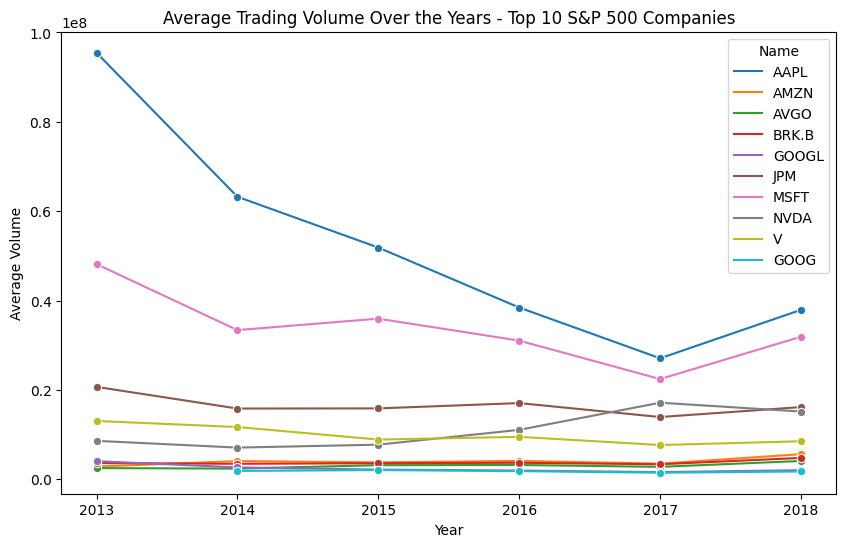

In [18]:
df_top10['year'] = df['date'].dt.year
# df_top10['year'] = pd.to_numeric(df['year'], errors='coerce')
volume_mean_year = (df_top10.groupby(['year', 'Name'])['volume'].mean().reset_index())

plt.figure(figsize=(10,6))
sns.lineplot(data=volume_mean_year, x='year', y='volume', hue='Name', marker='o')
plt.title('Average Trading Volume Over the Years - Top 10 S&P 500 Companies')
plt.ylabel('Average Volume')
plt.xlabel('Year')
plt.show()

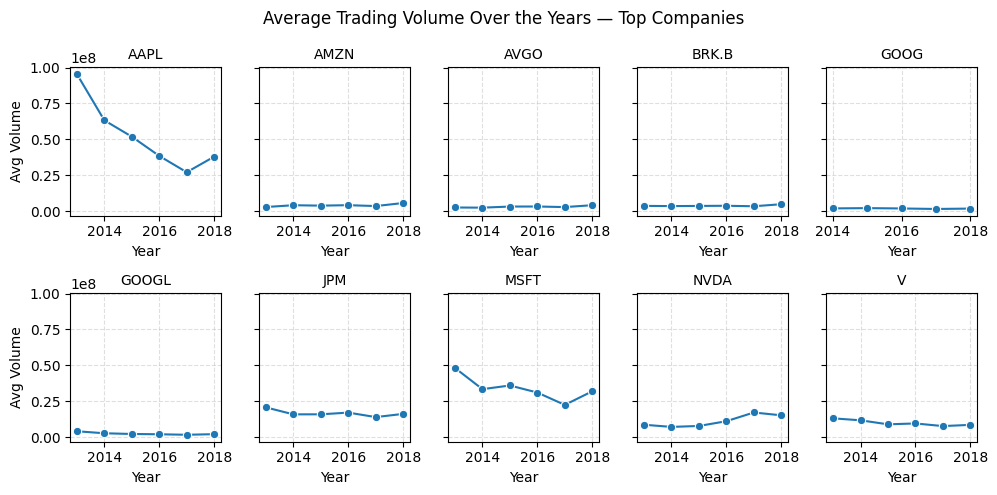

In [19]:
# Plot of average volume over the top 10 companies YEARLY

import math
companies = volume_mean_year['Name'].unique()
companies = np.sort(companies)
n=len(companies)
cols = 5
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(10, 5), sharey=True)
axes = np.array(axes).reshape(-1)  
for ax, company in zip(axes, companies):
    d = volume_mean_year[volume_mean_year['Name'] == company]
    sns.lineplot(ax=ax, data=d, x='year', y='volume', marker='o')
    ax.set_title(company, fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel('Avg Volume')
    ax.grid(True, linestyle='--', alpha=0.4)
for ax in axes[n:]:
    ax.axis('off')
fig.suptitle('Average Trading Volume Over the Years — Top Companies')
plt.tight_layout()
plt.show()

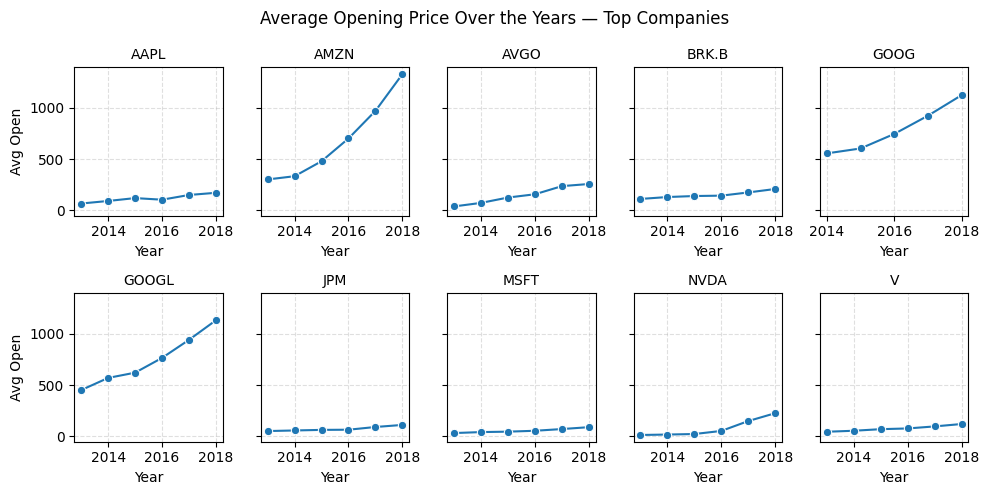

In [20]:
# Plot of average opening prices over the top 10 companies YEARLY

mean_open_yearly = (df_top10.groupby(['year', 'Name'])['open'].mean().reset_index())
companies = mean_open_yearly['Name'].unique()
companies = np.sort(companies)
n=len(companies)
cols = 5
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(10, 5), sharey=True)
axes = np.array(axes).reshape(-1)  
for ax, company in zip(axes, companies):
    d = mean_open_yearly[mean_open_yearly['Name'] == company]
    sns.lineplot(ax=ax, data=d, x='year', y='open', marker='o')
    ax.set_title(company, fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel('Avg Open')
    ax.grid(True, linestyle='--', alpha=0.4)
for ax in axes[n:]:
    ax.axis('off')
fig.suptitle('Average Opening Price Over the Years — Top Companies')
plt.tight_layout()
plt.show()

In [21]:
df_top10['month'] = df_top10['date'].dt.month
# df_top10['month'] = pd.to_numeric(df['month'], errors='coerce')

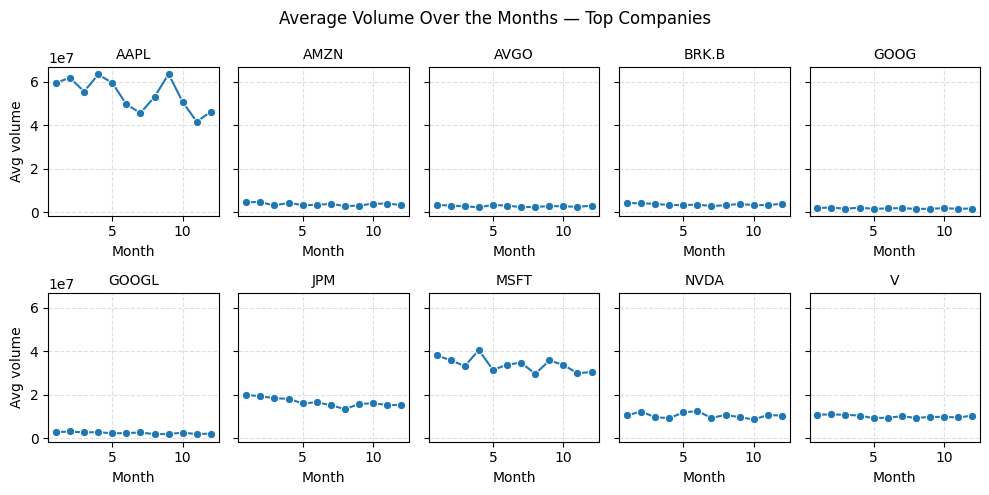

In [22]:
# Plot of average volume over the top 10 companies MONTHLY
mean_volume_monthly = (df_top10.groupby(['month', 'Name'])['volume'].mean().reset_index())
companies = df_top10['Name'].unique()
companies = np.sort(companies)
n=len(companies)
cols = 5
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(10, 5), sharey=True)
axes = np.array(axes).reshape(-1)  
for ax, company in zip(axes, companies):
    d = mean_volume_monthly[mean_volume_monthly['Name'] == company]
    sns.lineplot(ax=ax, data=d, x='month', y='volume', marker='o')
    ax.set_title(company, fontsize=10)
    ax.set_xlabel('Month')
    ax.set_ylabel('Avg volume')
    ax.grid(True, linestyle='--', alpha=0.4)
for ax in axes[n:]:
    ax.axis('off')
fig.suptitle('Average Volume Over the Months — Top Companies')
plt.tight_layout()
plt.show()

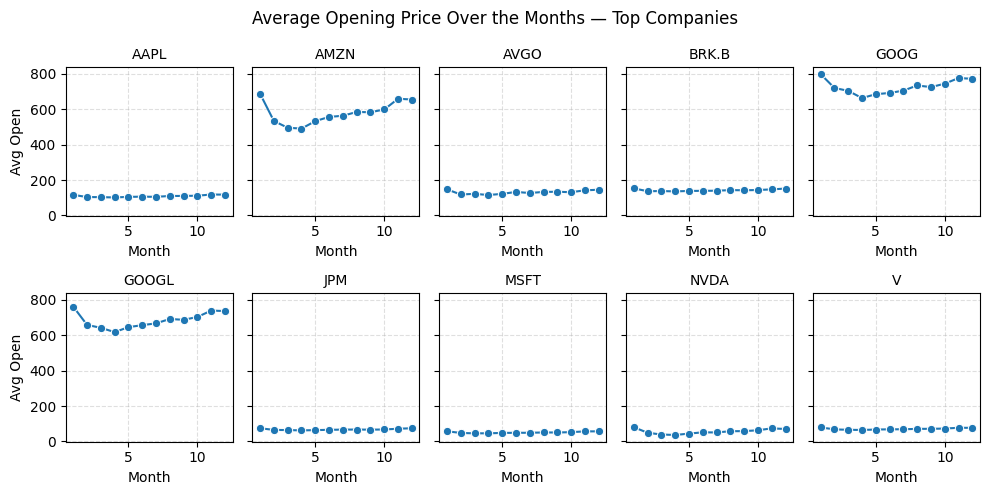

In [23]:
# Plot of average opening prices over the top 10 companies MONTHLY
mean_open_monthly = (df_top10.groupby(['month', 'Name'])['open'].mean().reset_index())
companies = df_top10['Name'].unique()
companies = np.sort(companies)
n=len(companies)
cols = 5
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(10, 5), sharey=True)
axes = np.array(axes).reshape(-1)  
for ax, company in zip(axes, companies):
    d = mean_open_monthly[mean_open_monthly['Name'] == company]
    sns.lineplot(ax=ax, data=d, x='month', y='open', marker='o')
    ax.set_title(company, fontsize=10)
    ax.set_xlabel('Month')
    ax.set_ylabel('Avg Open')
    ax.grid(True, linestyle='--', alpha=0.4)
for ax in axes[n:]:
    ax.axis('off')
fig.suptitle('Average Opening Price Over the Months — Top Companies')
plt.tight_layout()
plt.show()

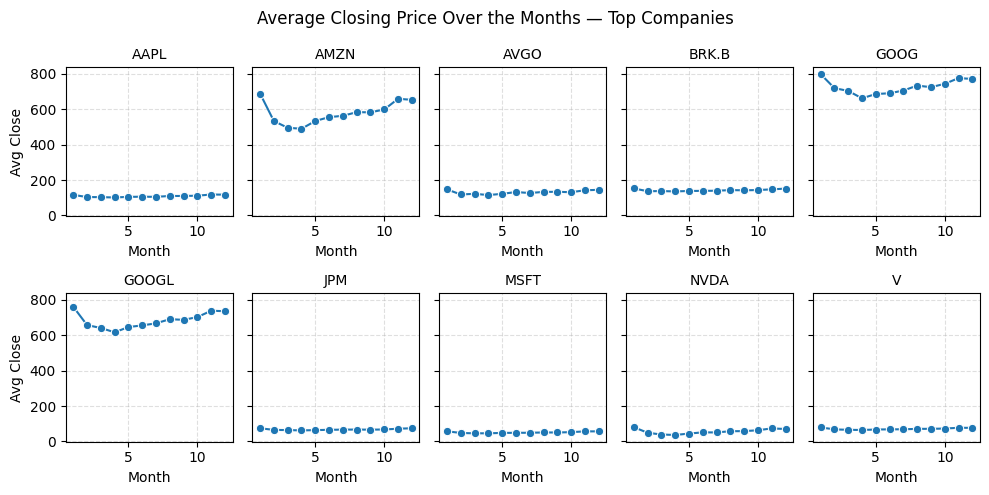

In [24]:
# Plot of average closing prices over the top 10 companies MONTHLY
mean_close_monthly = (df_top10.groupby(['month', 'Name'])['close'].mean().reset_index())
companies = df_top10['Name'].unique()
companies = np.sort(companies)
n=len(companies)
cols = 5
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(10, 5), sharey=True)
axes = np.array(axes).reshape(-1)  
for ax, company in zip(axes, companies):
    d = mean_close_monthly[mean_close_monthly['Name'] == company]
    sns.lineplot(ax=ax, data=d, x='month', y='close', marker='o')
    ax.set_title(company, fontsize=10)
    ax.set_xlabel('Month')
    ax.set_ylabel('Avg Close')
    ax.grid(True, linestyle='--', alpha=0.4)
for ax in axes[n:]:
    ax.axis('off')
fig.suptitle('Average Closing Price Over the Months — Top Companies')
plt.tight_layout()
plt.show()

In [25]:
df_top10['Name'].unique()

array(['AAPL', 'AMZN', 'AVGO', 'BRK.B', 'GOOGL', 'GOOG', 'JPM', 'MSFT',
       'NVDA', 'V'], dtype=object)

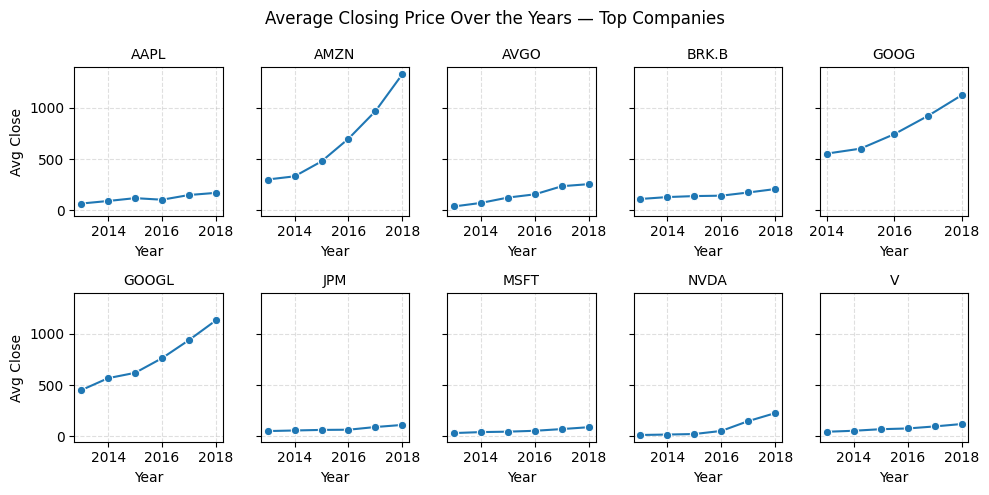

In [26]:
# Plot of average closing prices over the top 10 companies YEARLY

mean_close_yearly = (df_top10.groupby(['year', 'Name'])['close'].mean().reset_index())
companies = mean_close_yearly['Name'].unique()
companies = np.sort(companies)
n=len(companies)
cols = 5
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(10, 5), sharey=True)
axes = np.array(axes).reshape(-1)  
for ax, company in zip(axes, companies):
    d = mean_close_yearly[mean_close_yearly['Name'] == company]
    sns.lineplot(ax=ax, data=d, x='year', y='close', marker='o')
    ax.set_title(company, fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel('Avg Close')
    ax.grid(True, linestyle='--', alpha=0.4)
for ax in axes[n:]:
    ax.axis('off')
fig.suptitle('Average Closing Price Over the Years — Top Companies')
plt.tight_layout()
plt.show()

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
def explore_seasonality_residuals_loop(df, tickers, metric='close', period=12, auto_adjust=True):

    for ticker in tickers:
        data = df[df['Name'] == ticker].copy()

        if 'day' in data.columns:
            data['date'] = pd.to_datetime(data[['year','month','day']], errors='coerce')
        else:
            data['date'] = pd.to_datetime(data[['year','month']].assign(day=1), errors='coerce')

        data = data.dropna(subset=['date']).set_index('date').sort_index()

        if metric not in data.columns:
            print(f"[{ticker}] Skipping — metric '{metric}' not found.")
            continue

        series = data[metric].dropna()
        n_obs = len(series)

        if n_obs < 4:
            print(f"[{ticker}] Skipping — only {n_obs} observations.")
            continue

        if n_obs < period * 2:
            if auto_adjust:
                period_to_use = max(2, n_obs // 2)
                print(f"[{ticker}] Not enough data for period={period}. Using period={period_to_use}.")
            else:
                print(f"[{ticker}] Skipping — need ≥ {period*2} obs, have {n_obs}.")
                continue
        else:
            period_to_use = period

        result = seasonal_decompose(series, model='additive', period=period_to_use)
        fig = result.plot()
        fig.suptitle(f'{ticker} — {metric} Decomposition (period={period_to_use})', fontsize=14, y=1.02)
        plt.show()

        residuals = result.resid.dropna()
        residual_mean = residuals.mean()
        print(f"Residual mean: {residual_mean}")
        t_stat, p_value = stats.ttest_1samp(residuals, 0)
        print(f"[{ticker}] Residual mean: {residual_mean:.4f}, p-value: {p_value:.4f}")
        if p_value < 0.05:
            print(f"  → Significant bias detected ({'underestimation' if residual_mean > 0 else 'overestimation'}).")
        else:
            print("  → No significant bias detected.")
        plt.figure(figsize=(10,4))
        plt.plot(residuals)
        plt.title(f'Residuals — {ticker}')
        plt.xlabel('Date'); plt.ylabel('Residual')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()
        plt.figure()
        sns.histplot(residuals, kde=True)
        plt.title(f'Residual Distribution — {ticker}')
        plt.xlabel('Residual'); plt.ylabel('Count')
        plt.show()

        plt.figure()
        plot_acf(residuals, lags=min(50, len(residuals)-1))
        plt.title(f'ACF of Residuals — {ticker}')
        plt.show()


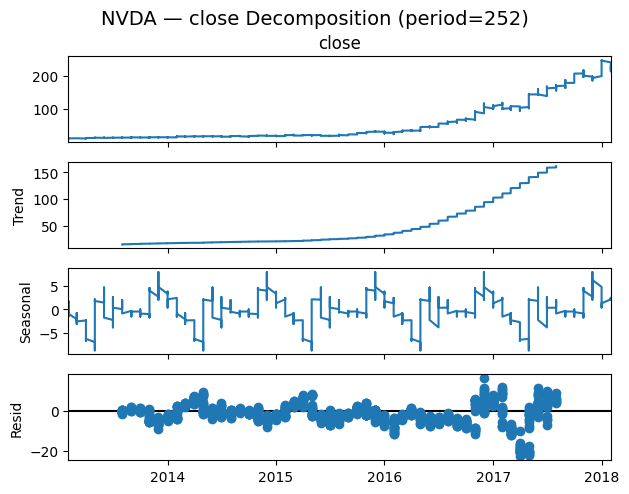

Residual mean: -1.327833069570418
[NVDA] Residual mean: -1.3278, p-value: 0.0000
  → Significant bias detected (overestimation).


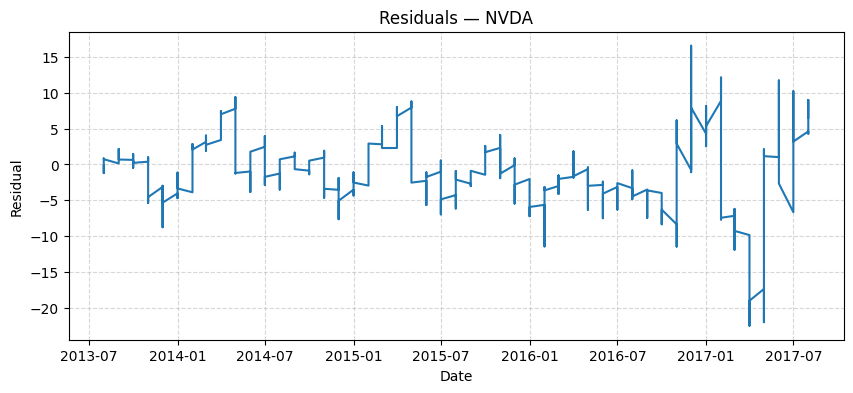

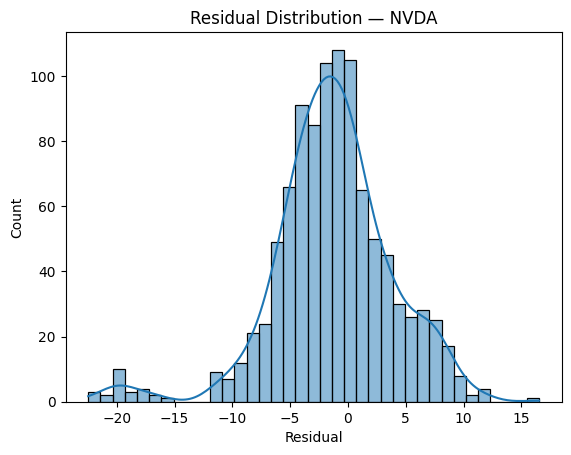

<Figure size 640x480 with 0 Axes>

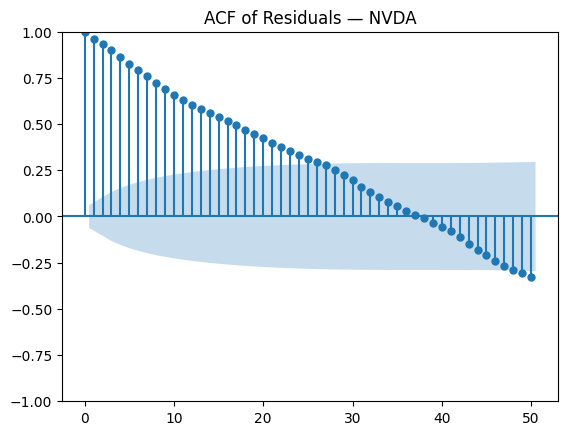

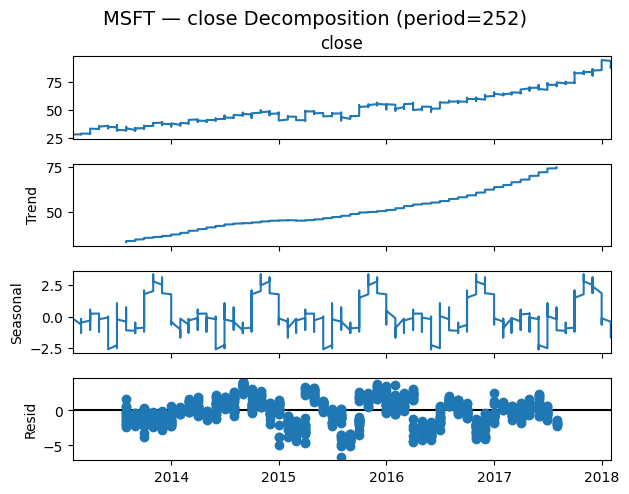

Residual mean: -0.20014841584781795
[MSFT] Residual mean: -0.2001, p-value: 0.0004
  → Significant bias detected (overestimation).


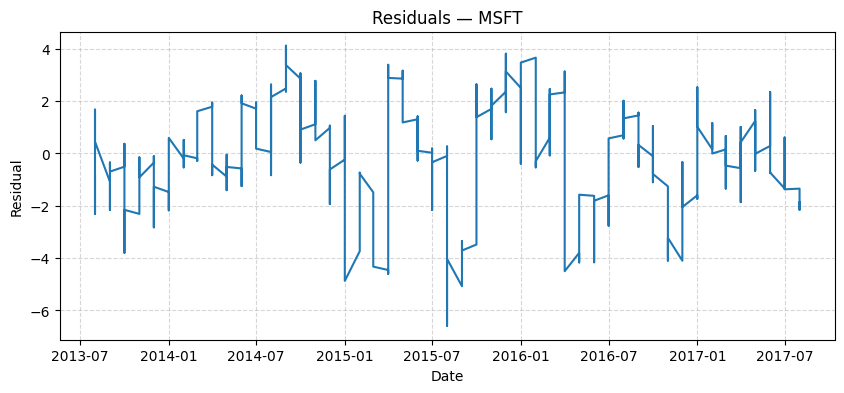

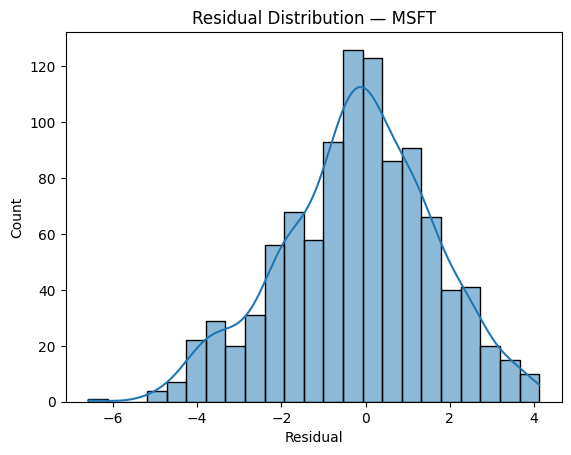

<Figure size 640x480 with 0 Axes>

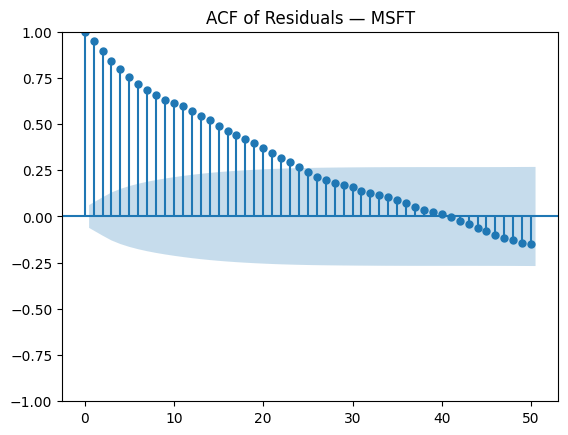

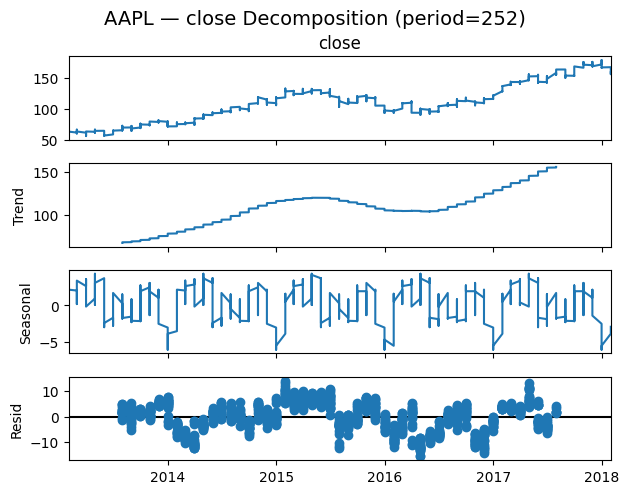

Residual mean: -0.11952975816483248
[AAPL] Residual mean: -0.1195, p-value: 0.4904
  → No significant bias detected.


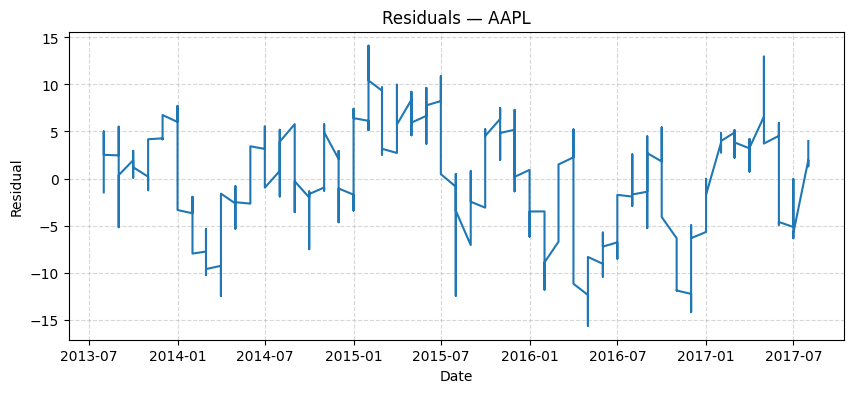

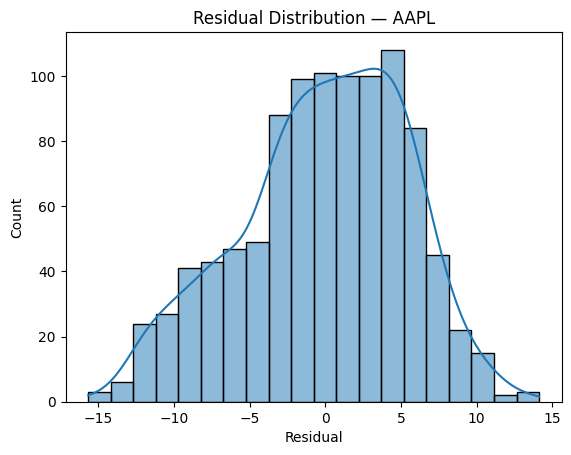

<Figure size 640x480 with 0 Axes>

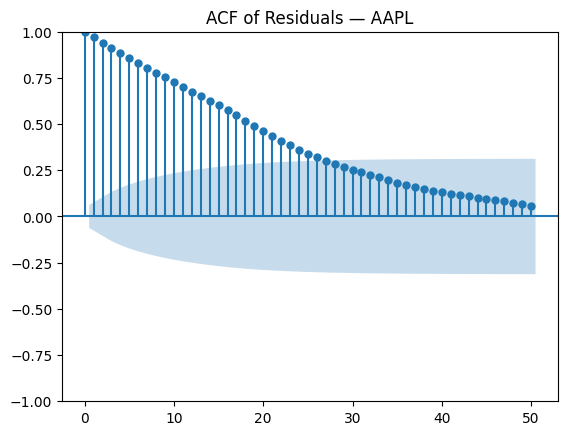

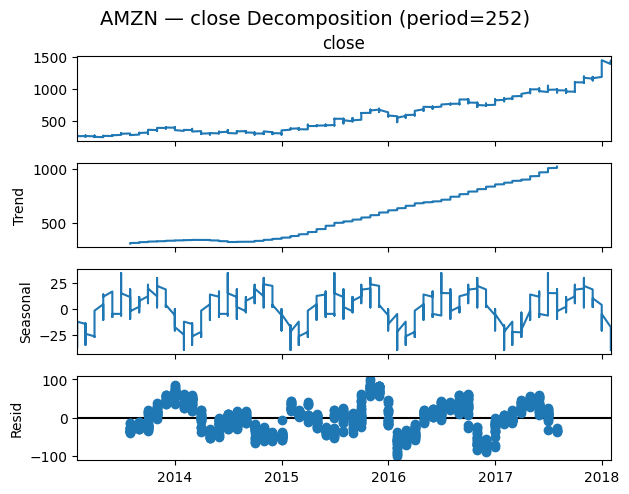

Residual mean: -0.4848607030003015
[AMZN] Residual mean: -0.4849, p-value: 0.6865
  → No significant bias detected.


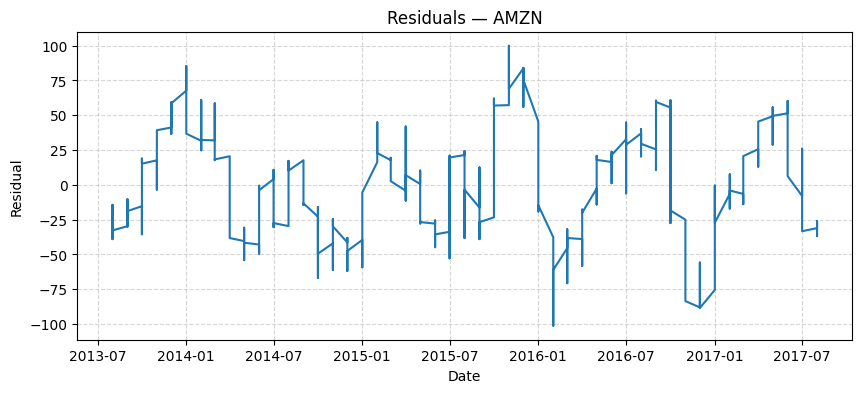

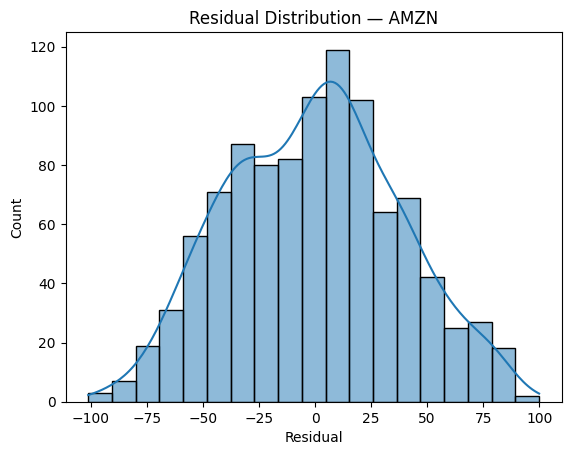

<Figure size 640x480 with 0 Axes>

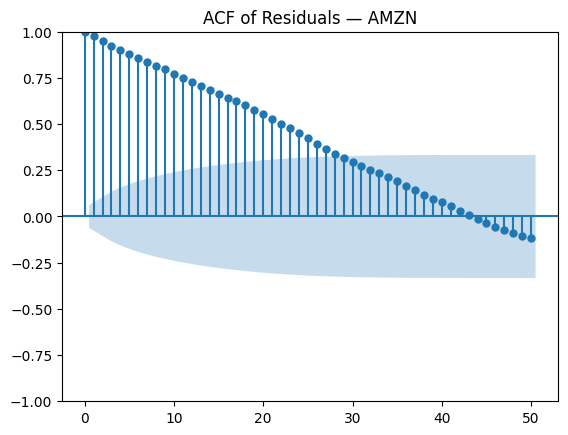

[Alphabet] Skipping — only 0 observations.
[META] Skipping — only 0 observations.


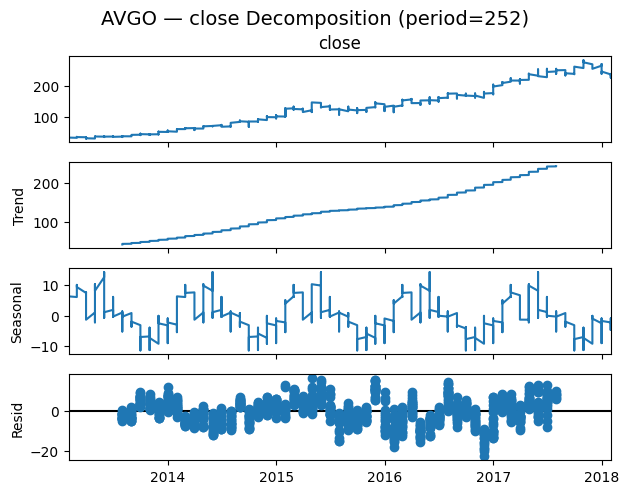

Residual mean: -0.2560920279956064
[AVGO] Residual mean: -0.2561, p-value: 0.1960
  → No significant bias detected.


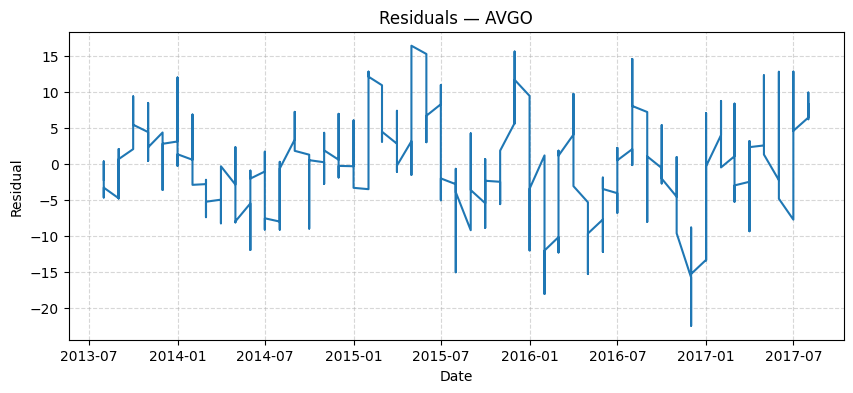

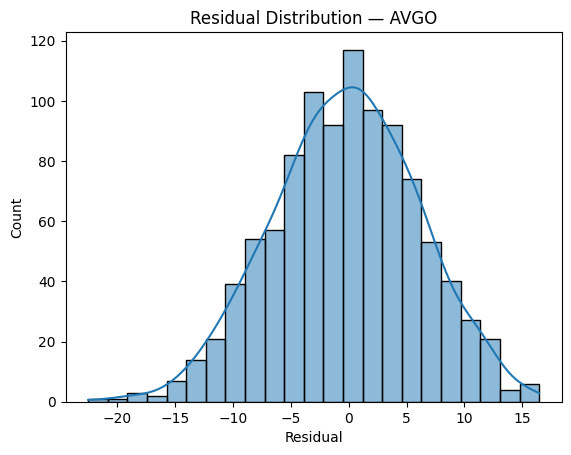

<Figure size 640x480 with 0 Axes>

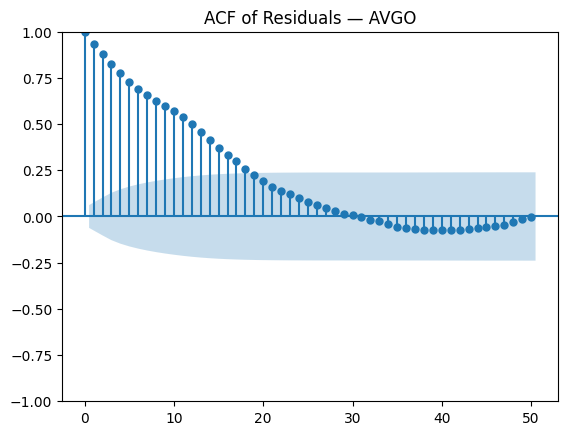

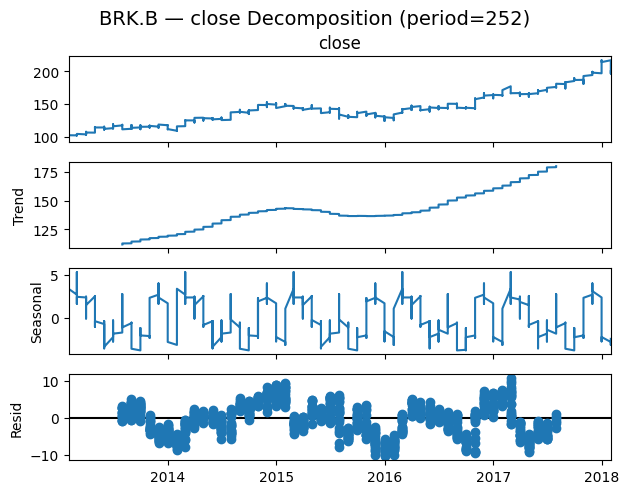

Residual mean: -0.4045380802783997
[BRK.B] Residual mean: -0.4045, p-value: 0.0024
  → Significant bias detected (overestimation).


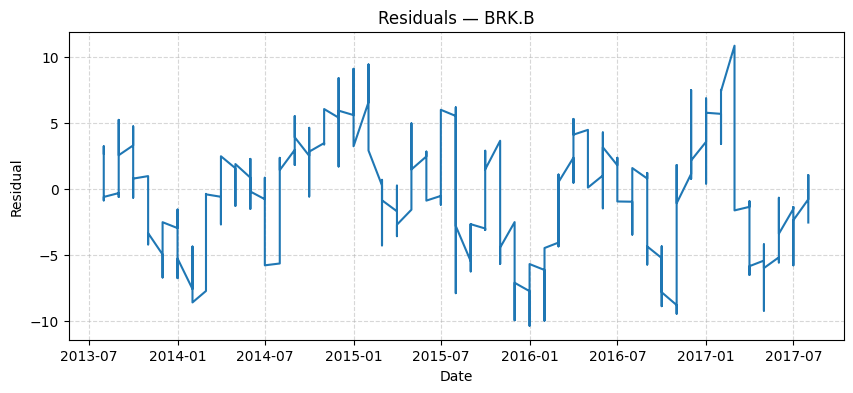

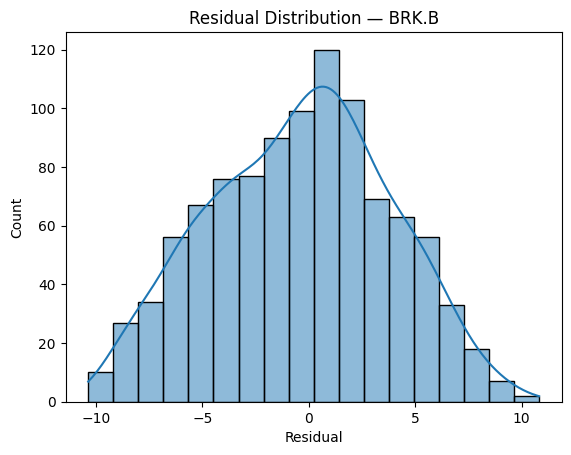

<Figure size 640x480 with 0 Axes>

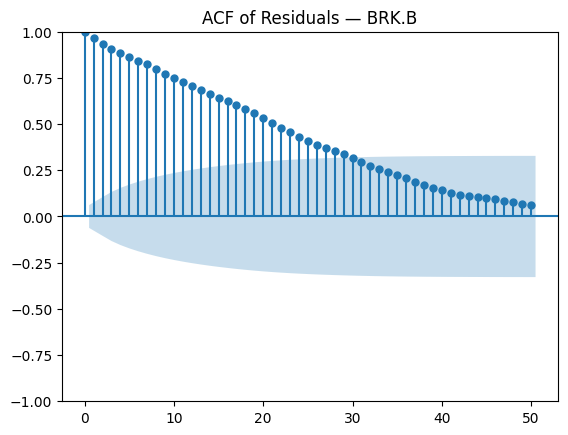

[TSLA] Skipping — only 0 observations.


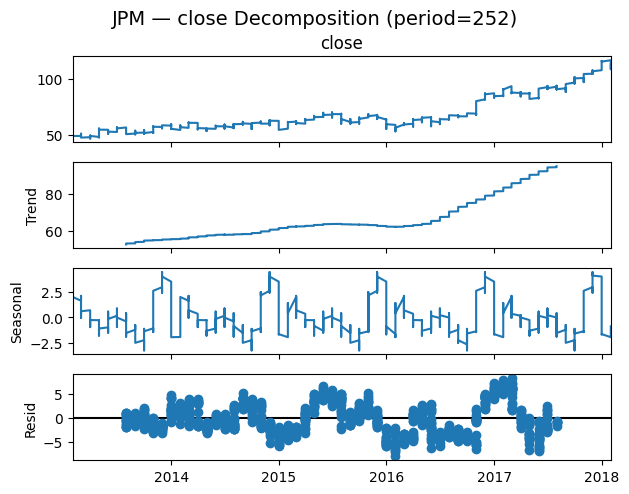

Residual mean: -0.21942569234483583
[JPM] Residual mean: -0.2194, p-value: 0.0244
  → Significant bias detected (overestimation).


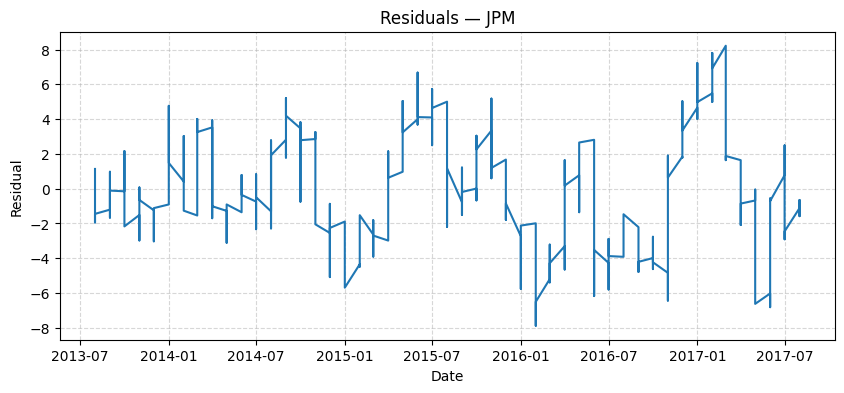

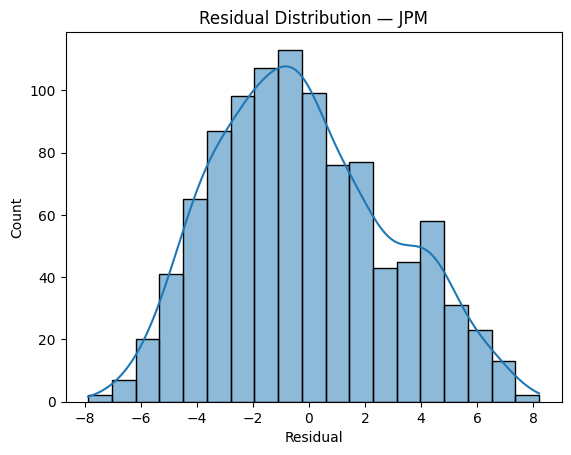

<Figure size 640x480 with 0 Axes>

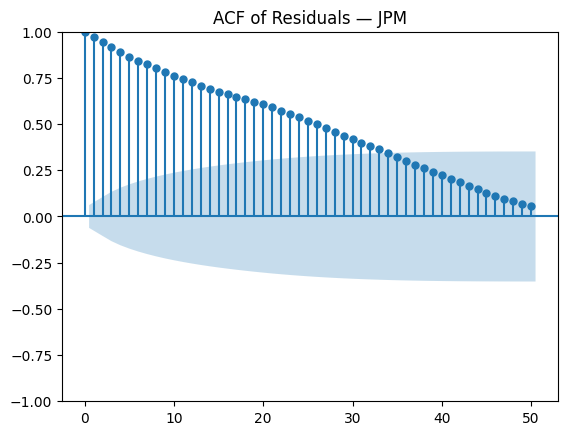

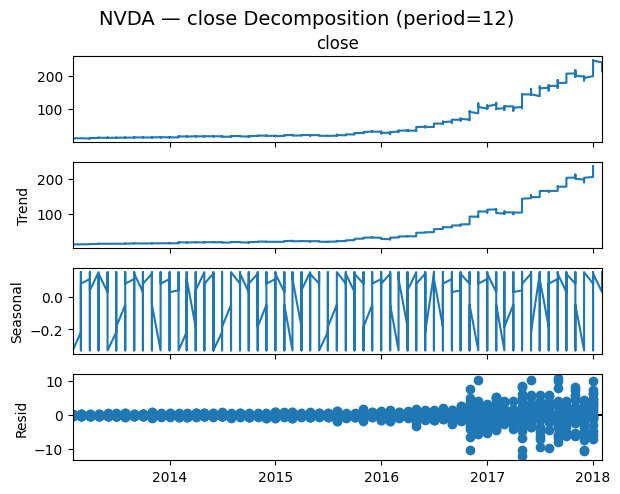

Residual mean: 0.0081380243989116
[NVDA] Residual mean: 0.0081, p-value: 0.8811
  → No significant bias detected.


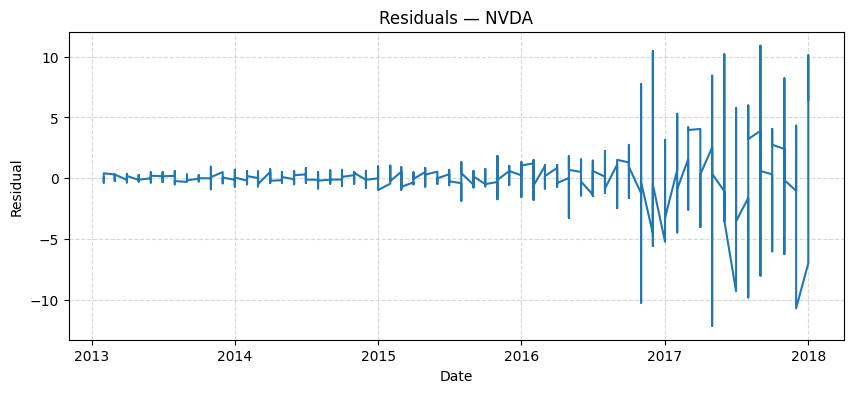

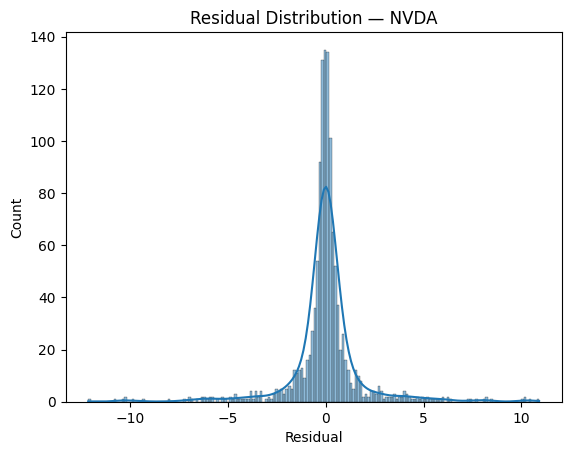

<Figure size 640x480 with 0 Axes>

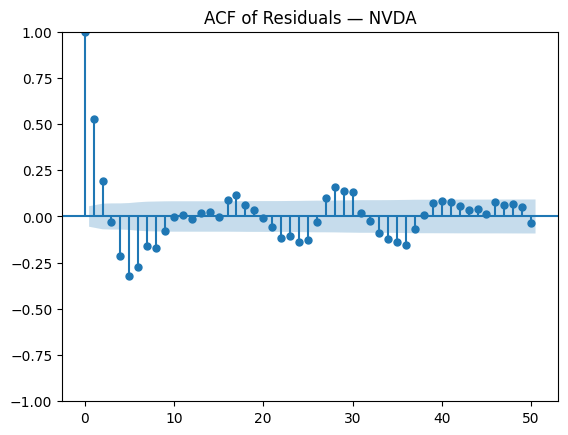

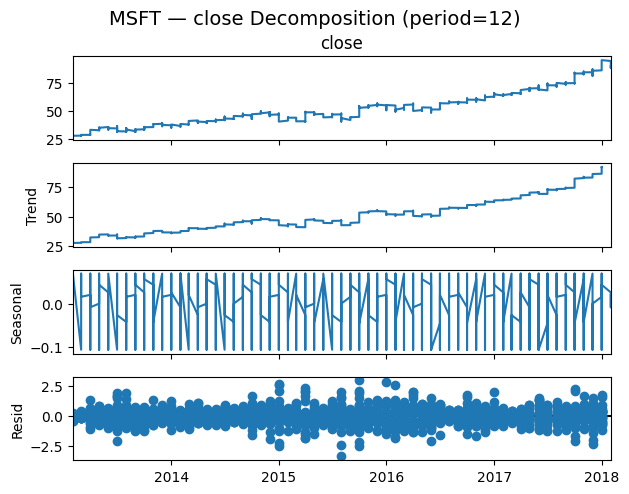

Residual mean: 0.00024103225355028498
[MSFT] Residual mean: 0.0002, p-value: 0.9902
  → No significant bias detected.


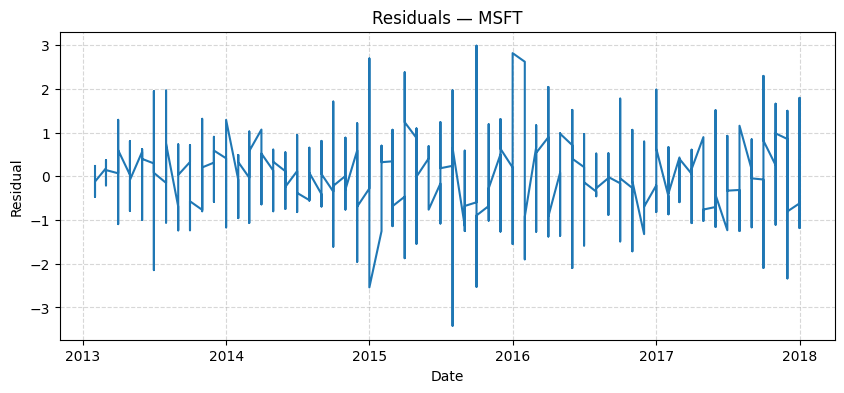

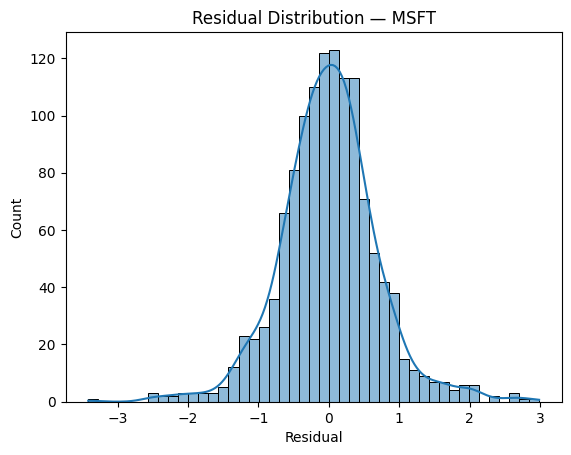

<Figure size 640x480 with 0 Axes>

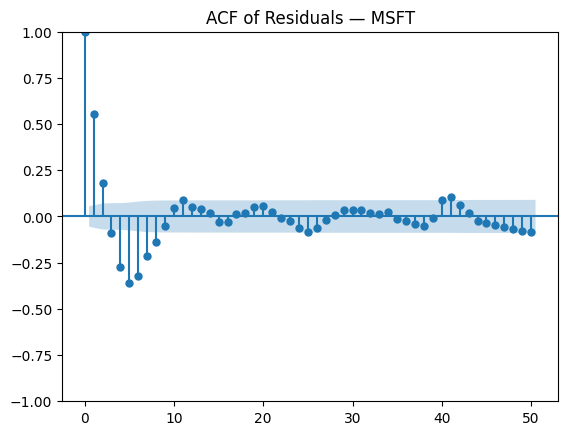

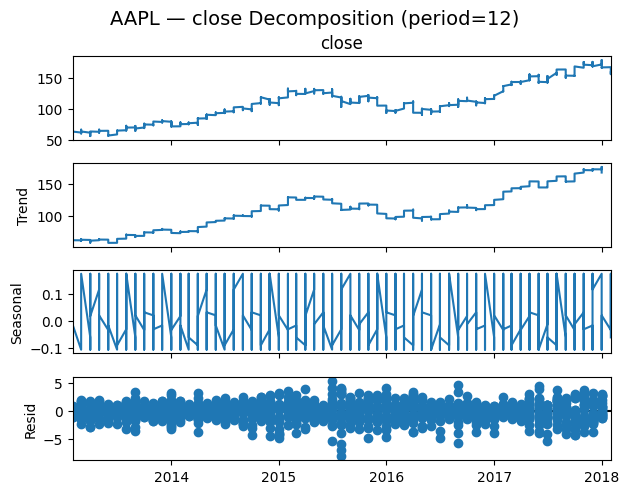

Residual mean: 0.004090386041620731
[AAPL] Residual mean: 0.0041, p-value: 0.9257
  → No significant bias detected.


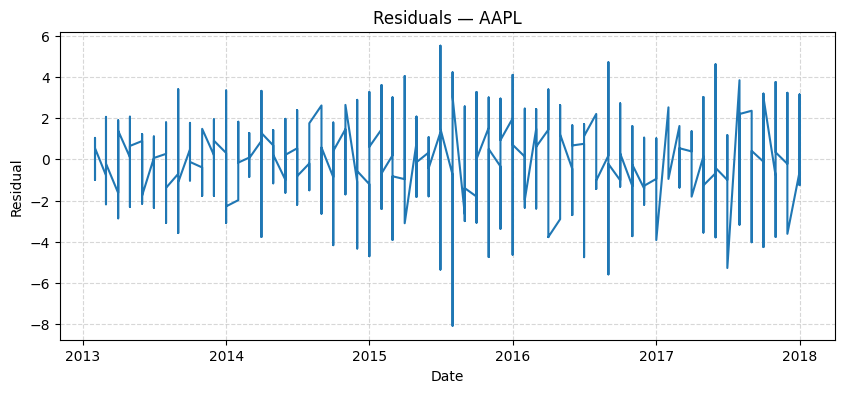

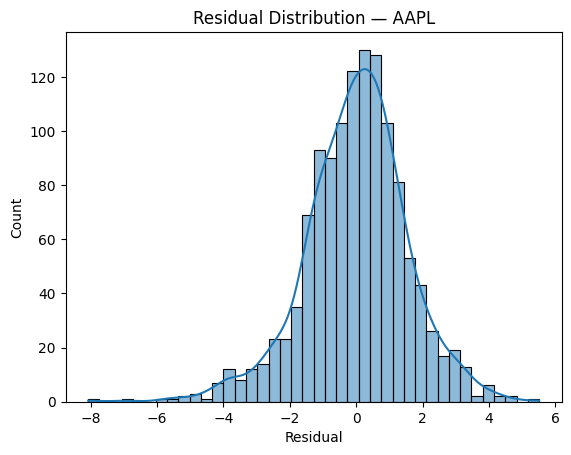

<Figure size 640x480 with 0 Axes>

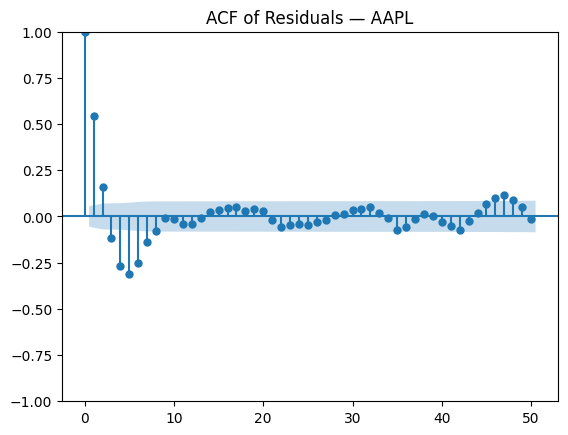

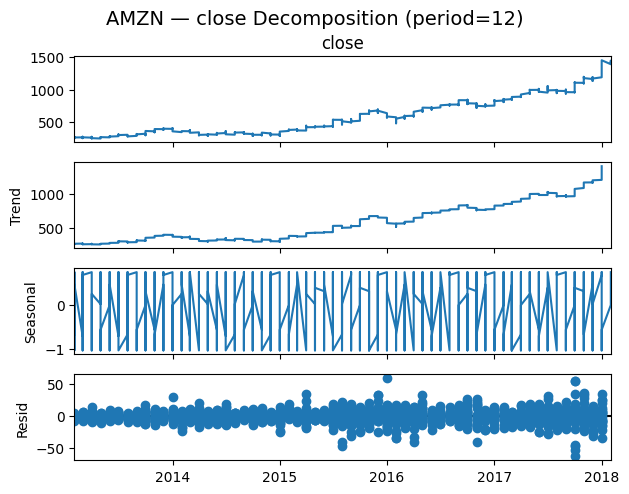

Residual mean: -0.014499469053366134
[AMZN] Residual mean: -0.0145, p-value: 0.9605
  → No significant bias detected.


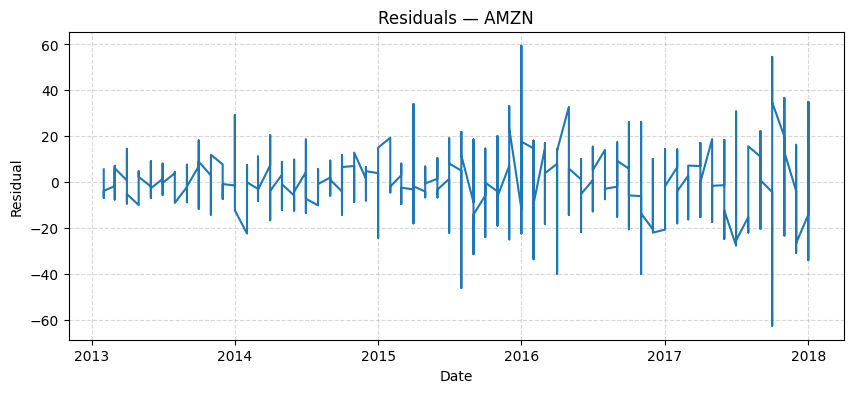

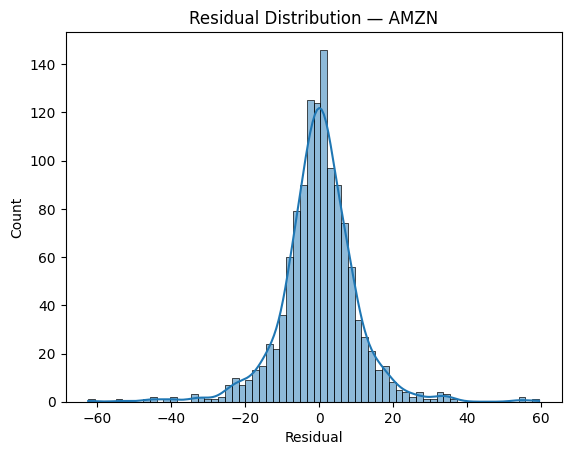

<Figure size 640x480 with 0 Axes>

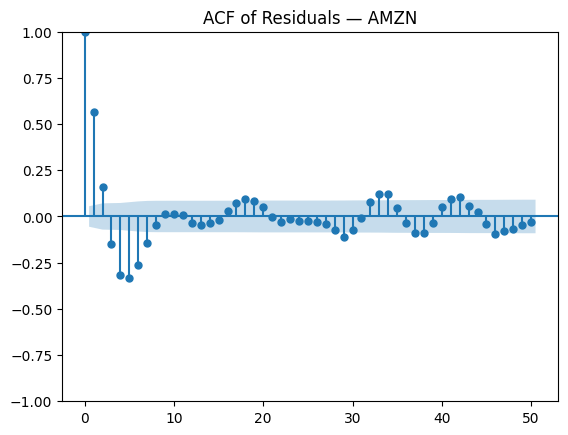

[Alphabet] Skipping — only 0 observations.
[META] Skipping — only 0 observations.


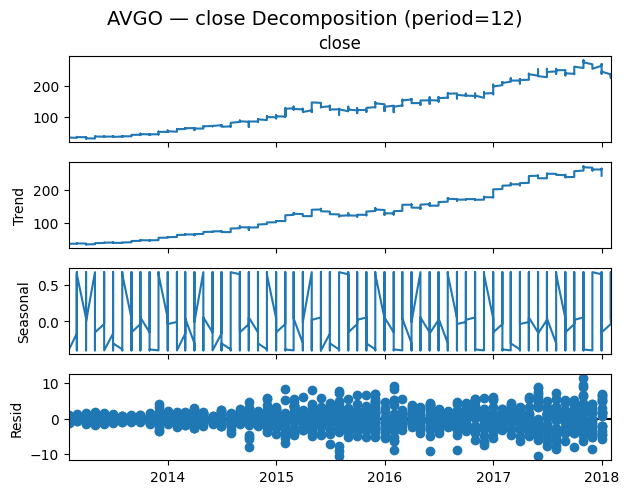

Residual mean: 0.007599544384289957
[AVGO] Residual mean: 0.0076, p-value: 0.9199
  → No significant bias detected.


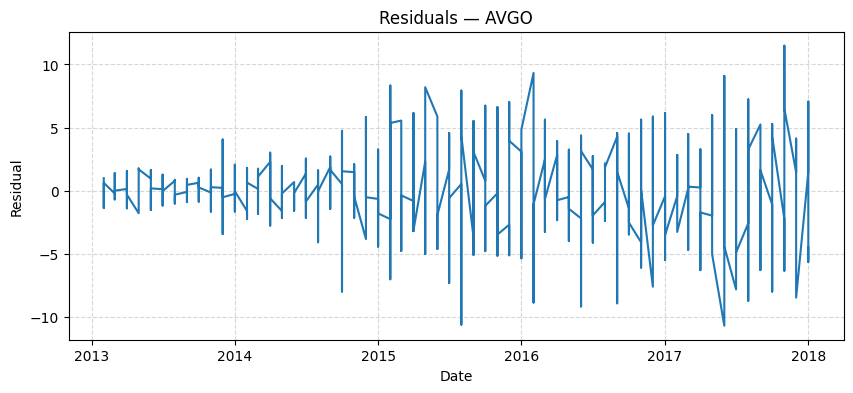

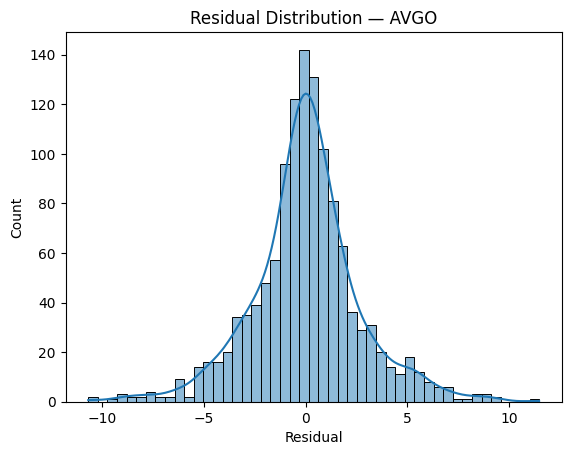

<Figure size 640x480 with 0 Axes>

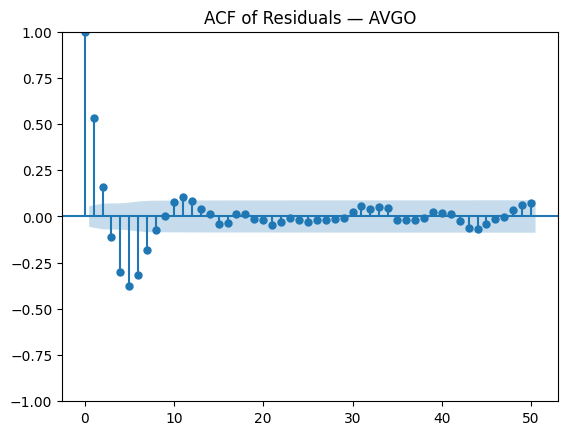

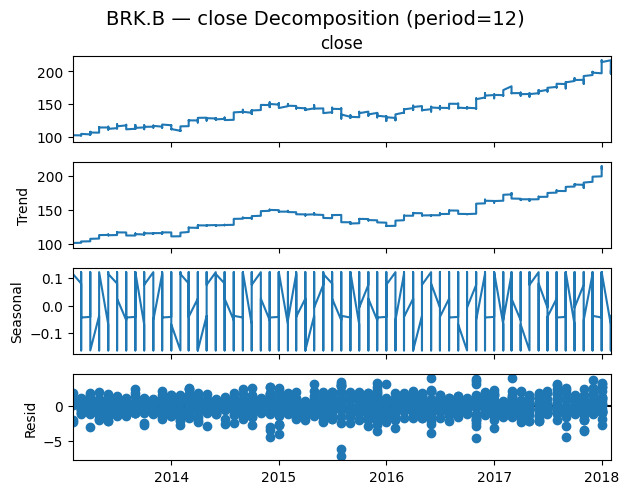

Residual mean: 0.008522555182150749
[BRK.B] Residual mean: 0.0085, p-value: 0.8021
  → No significant bias detected.


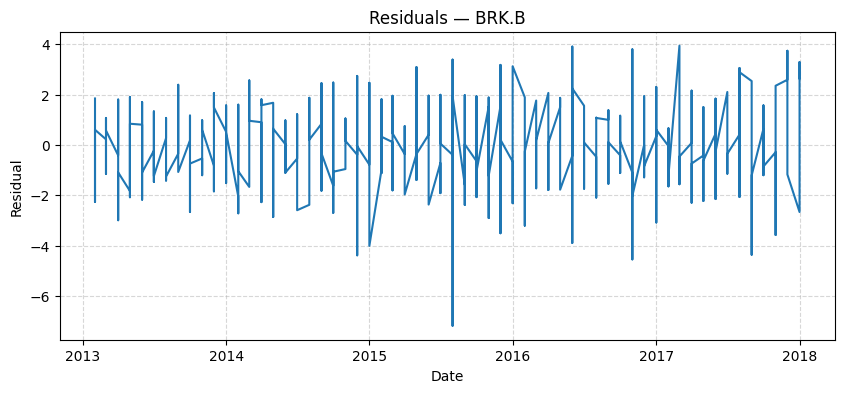

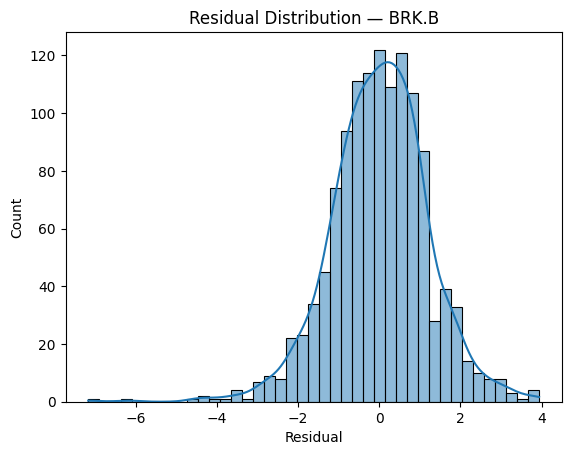

<Figure size 640x480 with 0 Axes>

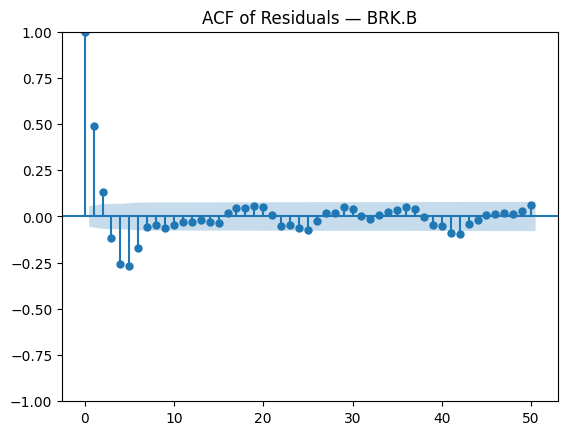

[TSLA] Skipping — only 0 observations.


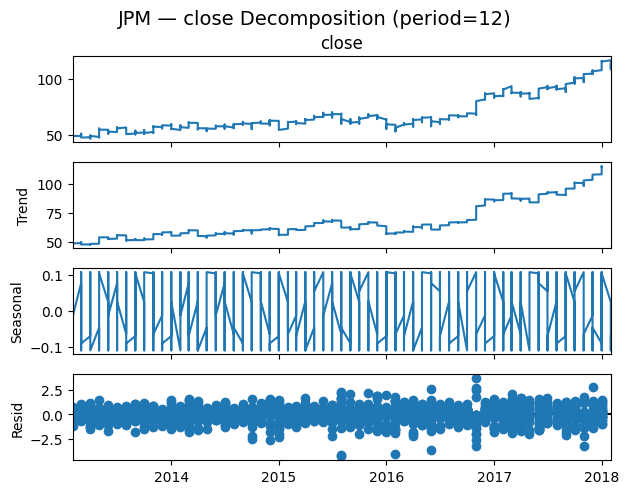

Residual mean: 0.0014634321062603423
[JPM] Residual mean: 0.0015, p-value: 0.9512
  → No significant bias detected.


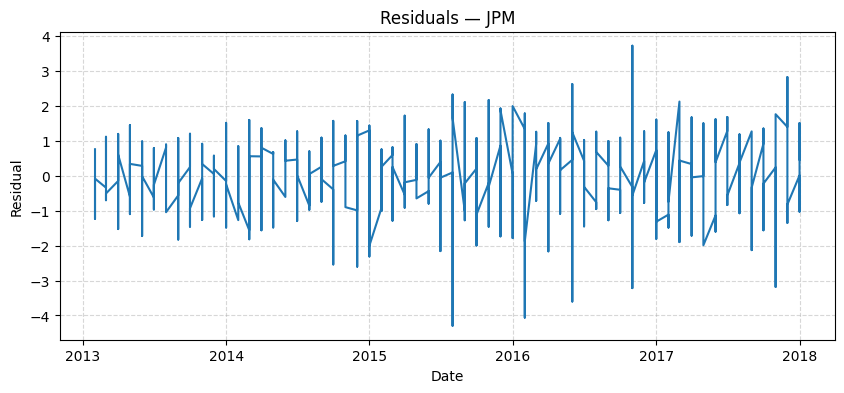

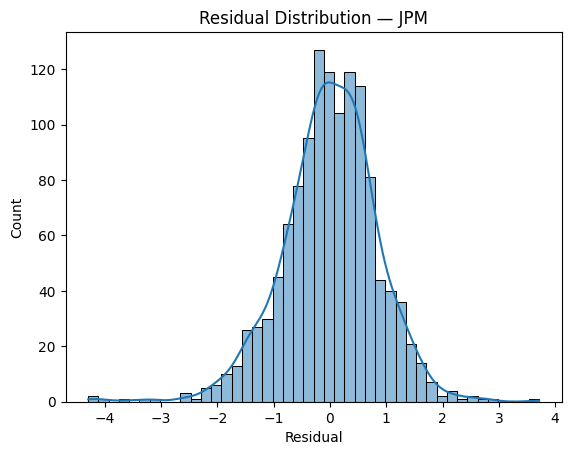

<Figure size 640x480 with 0 Axes>

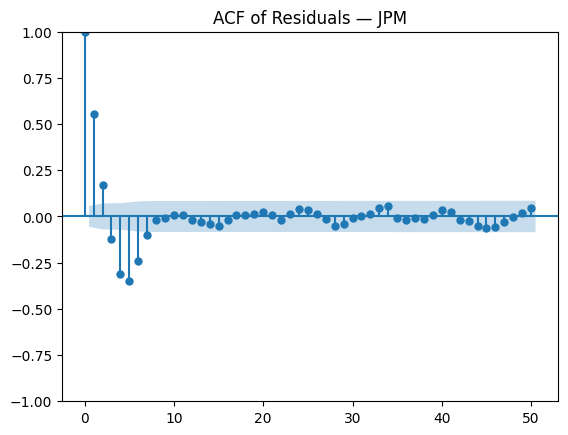

In [28]:
top_companies = ['NVDA', 'MSFT', 'AAPL', 'AMZN', 'Alphabet', 'META', 'AVGO', 'BRK.B', 'TSLA', 'JPM']
# For daily data:
explore_seasonality_residuals_loop(df_top10, top_companies, metric='close', period=252)

# For monthly data:
explore_seasonality_residuals_loop(df_top10, top_companies, metric='close', period=12)


<Axes: xlabel='month', ylabel='open'>

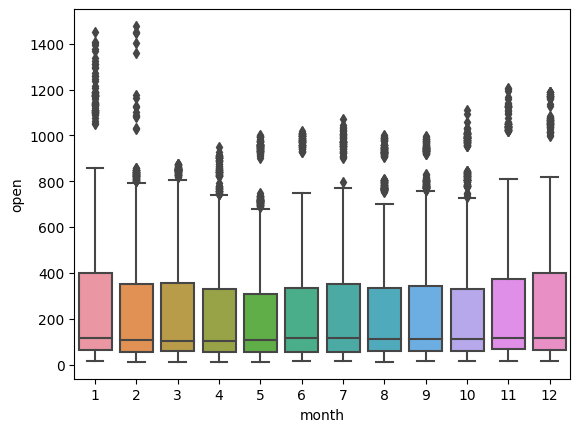

In [29]:
sns.boxplot(data=df_top10,x='month',y='open')

<Axes: xlabel='month', ylabel='close'>

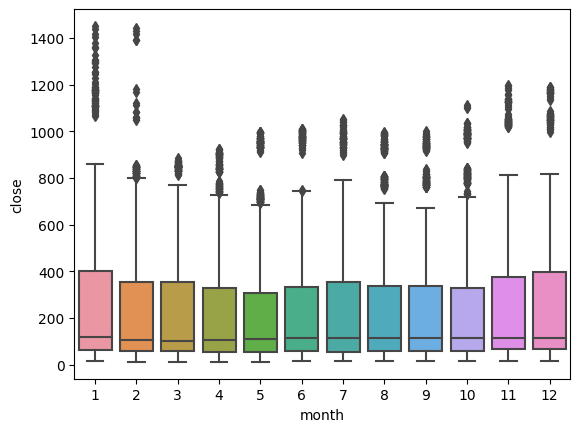

In [30]:
sns.boxplot(data=df_top10,x='month',y='close')

<Axes: xlabel='month', ylabel='volume'>

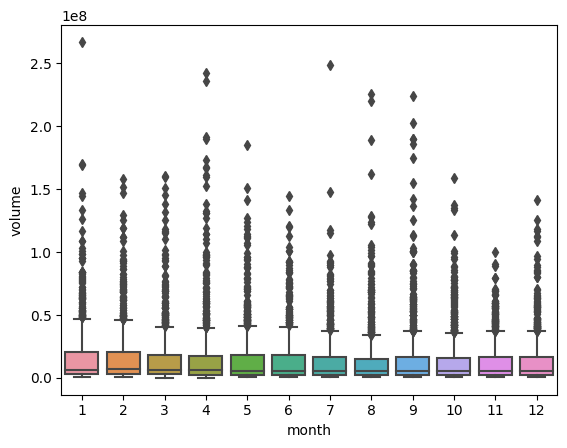

In [31]:
sns.boxplot(data=df_top10,x='month',y='volume')

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
short_series = df_top10['date'][-2000:]  # last 2000 points
result = adfuller(short_series, maxlag=10)
result

(0.5405011312834583,
 0.9860534749294692,
 0,
 1999,
 {'1%': -3.4336254962865045,
  '5%': -2.862986937508278,
  '10%': -2.567540287745173},
 148068.63228060477)

Data is not stationary since p-value is larger than 0.05. Below I will make the data stationary so it is ready for the ARIMA model

In [34]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Get the series
series = df_top10[df_top10['Name'] == 'NVDA'].set_index('date')['close']

# Optionally apply log transform first (for variance stabilisation)
series_log = np.log(series)

# First differencing
series_diff = series_log.diff().dropna()

# ADF test again
result = adfuller(series_diff)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -36.68630123132376
p-value: 0.0


In [35]:
from statsmodels.tsa.stattools import adfuller
def adf_test_all(df_top10, tickers, metric='close', log_transform=False, diff=0):
    results = []
    
    for ticker in tickers:
        data = df[df['Name'] == ticker].copy()
        
        if 'date' not in data.columns:
            print(f"[{ticker}] Skipped — no 'date' column.")
            continue
        
        
        data['date'] = pd.to_datetime(data['date'], errors='coerce')
        data = data.dropna(subset=['date']).set_index('date').sort_index()
        
        if metric not in data.columns:
            print(f"[{ticker}] Skipped — metric '{metric}' not found.")
            continue
        
        series = data[metric].dropna()
        
        if log_transform:
            series = np.log(series.replace(0, np.nan)).dropna()
        
        for _ in range(diff):
            series = series.diff().dropna()
        
        if len(series) < 5:
            print(f"[{ticker}] Skipped — too few observations after differencing.")
            continue
        
        adf_stat, p_value, _, _, crit_values, _ = adfuller(series)
        stationary = p_value < 0.05
        
        results.append({
            'Ticker': ticker,
            'ADF Statistic': adf_stat,
            'p-value': p_value,
            'Stationary?': 'Yes' if stationary else 'No'
        })
    
    return pd.DataFrame(results)


In [36]:
adf_results = adf_test_all(df_top10, top_companies, metric='close')
print(adf_results)

# With log + 1 differencing
adf_results_log_diff = adf_test_all(df_top10, top_companies, metric='close', log_transform=True, diff=1)
print(adf_results_log_diff)

[Alphabet] Skipped — too few observations after differencing.
[META] Skipped — too few observations after differencing.
[TSLA] Skipped — too few observations after differencing.
  Ticker  ADF Statistic   p-value Stationary?
0   NVDA       3.444709  1.000000          No
1   MSFT       0.415655  0.982071          No
2   AAPL      -0.665091  0.855586          No
3   AMZN       2.483785  0.999044          No
4   AVGO      -0.475100  0.896785          No
5  BRK.B      -0.319063  0.922761          No
6    JPM       0.815223  0.991878          No
[Alphabet] Skipped — too few observations after differencing.
[META] Skipped — too few observations after differencing.
[TSLA] Skipped — too few observations after differencing.
  Ticker  ADF Statistic  p-value Stationary?
0   NVDA     -36.686301      0.0         Yes
1   MSFT     -35.395342      0.0         Yes
2   AAPL     -34.347762      0.0         Yes
3   AMZN     -19.375598      0.0         Yes
4   AVGO     -36.150967      0.0         Yes
5  BRK

In [37]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.4 MB/s eta 0:00:0000:0100:01


In [38]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

In [39]:
def arima_forecast_loop(df, tickers, metric='close', forecast_periods=12, log_transform=False, test_size_ratio=0.2):
    results = []
    
    for ticker in tickers:
        data = df[df['Name'] == ticker].copy()
        if 'date' not in data.columns:
            print(f"[{ticker}] Skipping — no 'date' column.")
            continue
        
        data['date'] = pd.to_datetime(data['date'], errors='coerce')
        data = data.dropna(subset=['date']).set_index('date').sort_index()
        
        if metric not in data.columns:
            print(f"[{ticker}] Skipping — metric '{metric}' not found.")
            continue
        
        series = data[metric].dropna()
        if log_transform:
            series = np.log(series.replace(0, np.nan)).dropna()
        
        if len(series) < forecast_periods + 5:
            print(f"[{ticker}] Skipping — not enough data.")
            continue
        
        train_size = int(len(series) * (1 - test_size_ratio))
        train, test = series.iloc[:train_size], series.iloc[train_size:]
        
        auto_model = auto_arima(train, seasonal=False, trace=False,
                                error_action='ignore', suppress_warnings=True, stepwise=True)
        p, d, q = auto_model.order
        
        model = ARIMA(train, order=(p, d, q))
        model_fit = model.fit()
        
        # Forecast test set
        forecast_res = model_fit.get_forecast(steps=len(test))
        forecast = forecast_res.predicted_mean
        conf_int = forecast_res.conf_int()
        
        # RMSE calculation
        rmse = np.sqrt(mean_squared_error(test, forecast))
        mean_price = series.mean()
        rmse_pct = (rmse / mean_price) * 100
        pass_check = 'PASS' if rmse_pct < 5 else 'FAIL'
        
        # Store summary
        results.append({
            'Ticker': ticker,
            'Order': (p, d, q),
            'AIC': model_fit.aic,
            'BIC': model_fit.bic,
            'RMSE': rmse,
            'Mean Price': mean_price,
            'RMSE % of Mean': rmse_pct,
            'Pass <5%?': pass_check
        })
        
        plt.figure(figsize=(10,5))
        plt.plot(train, label='Train')
        plt.plot(test, label='Test', color='blue')
        plt.plot(forecast, label='Forecast', color='orange')
        plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], 
                         color='orange', alpha=0.2)
        plt.axvline(test.index[0], color='red', linestyle='--', alpha=0.6)  # Mark forecast start
        plt.title(f"{ticker} ARIMA{(p,d,q)} — RMSE: {rmse:.2f} ({rmse_pct:.2f}%)")
        plt.legend()
        plt.show()
    
    return pd.DataFrame(results)


targeting RMSE < 5% of mean price (±10% error).
Validate forecasts with historical trends and confidence intervals.

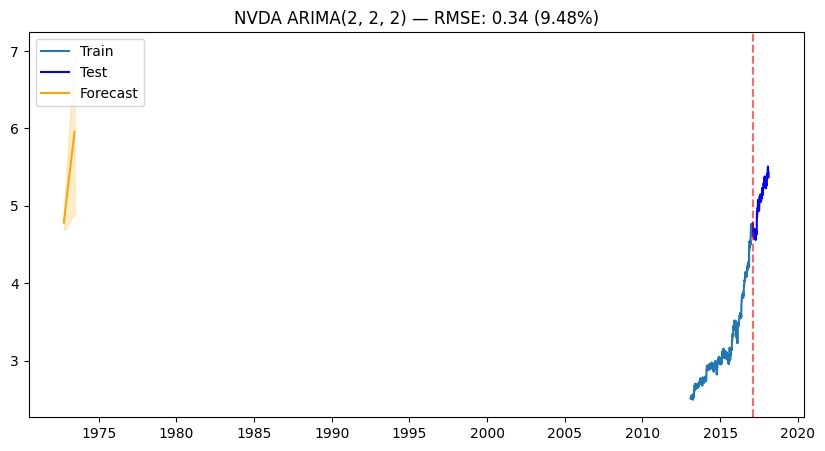

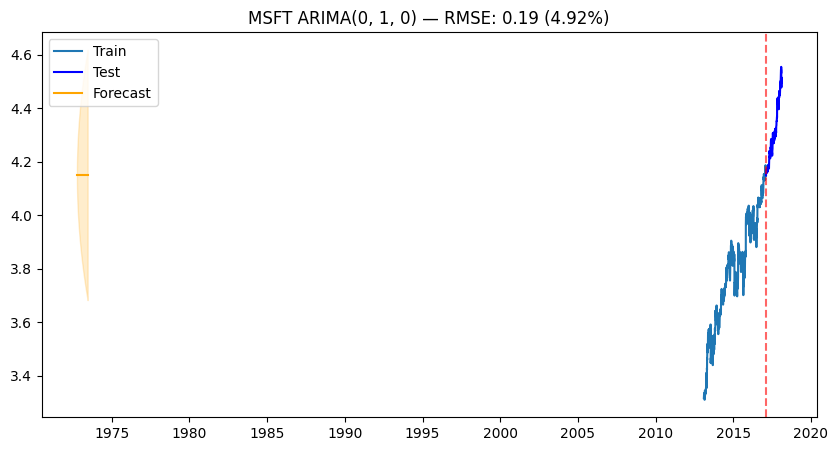

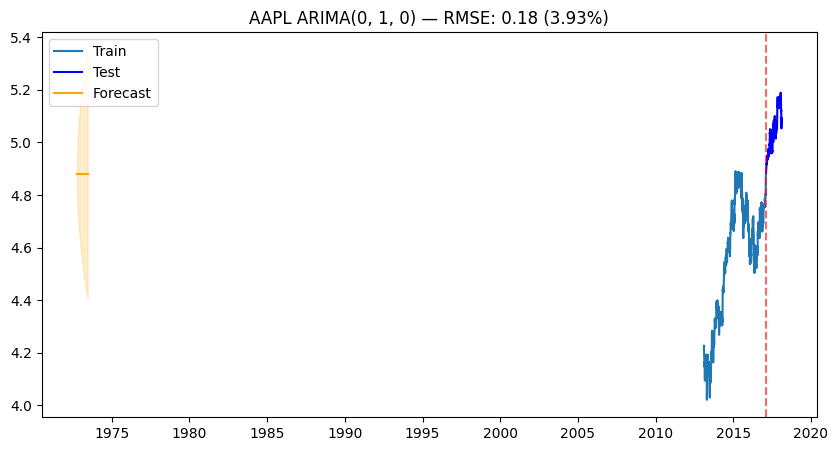

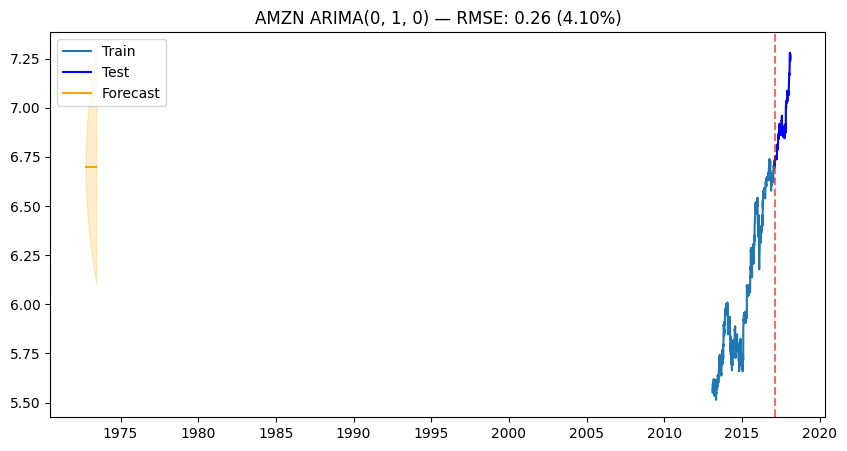

[Alphabet] Skipping — not enough data.
[META] Skipping — not enough data.


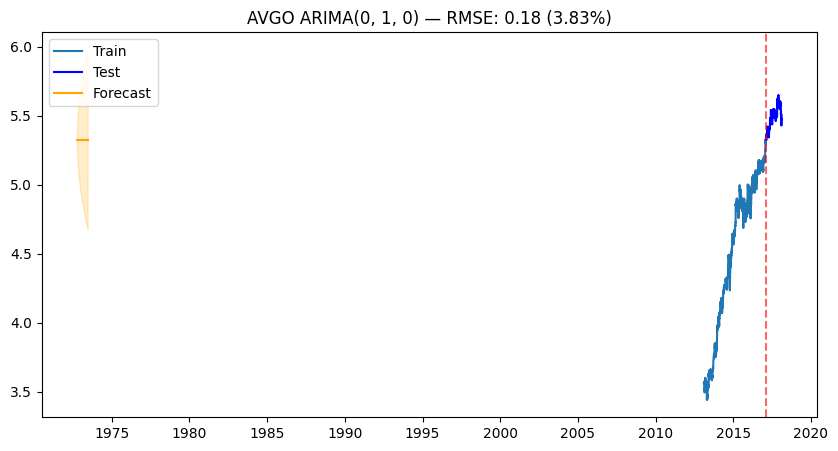

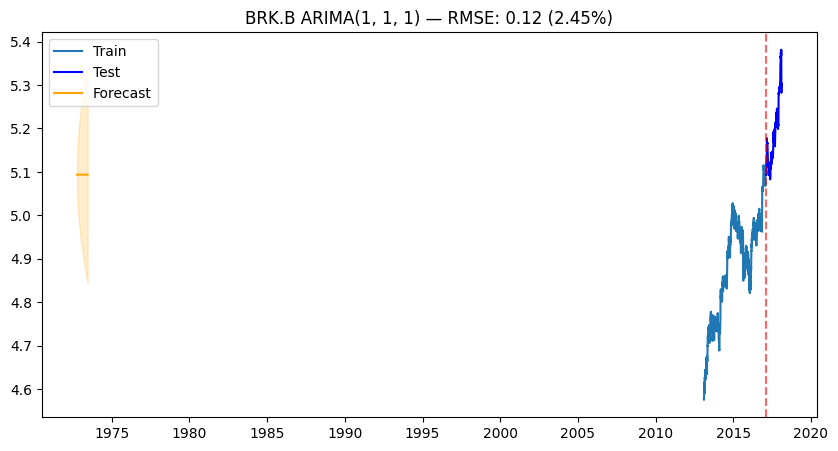

[TSLA] Skipping — not enough data.


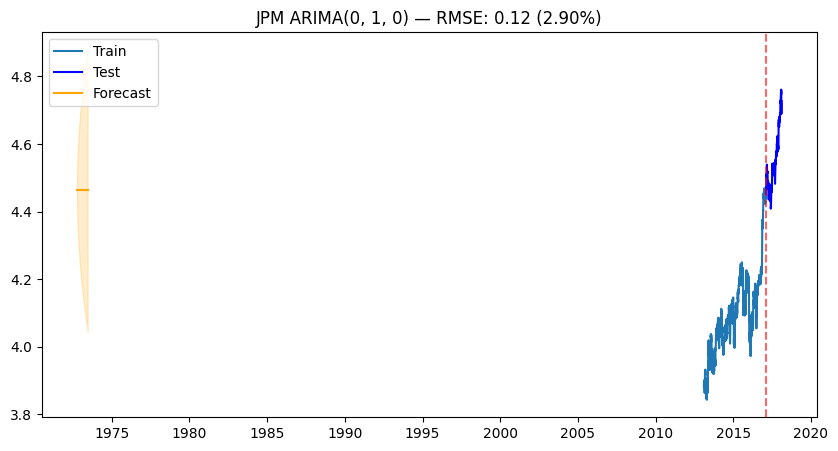

In [40]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
forecast_summary = arima_forecast_loop(df_top10, top_companies, metric='close', 
                                       forecast_periods=12, log_transform=True, 
                                       test_size_ratio=0.2)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-4920.590, Time=1.50 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-4210.479, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-4537.225, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-4212.479, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-4863.588, Time=0.53 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-4919.406, Time=1.92 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-4884.381, Time=2.98 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.38 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-4910.603, Time=2.68 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-4912.687, Time=2.16 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-4900.345, Time=2.71 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=1.18 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0] interc

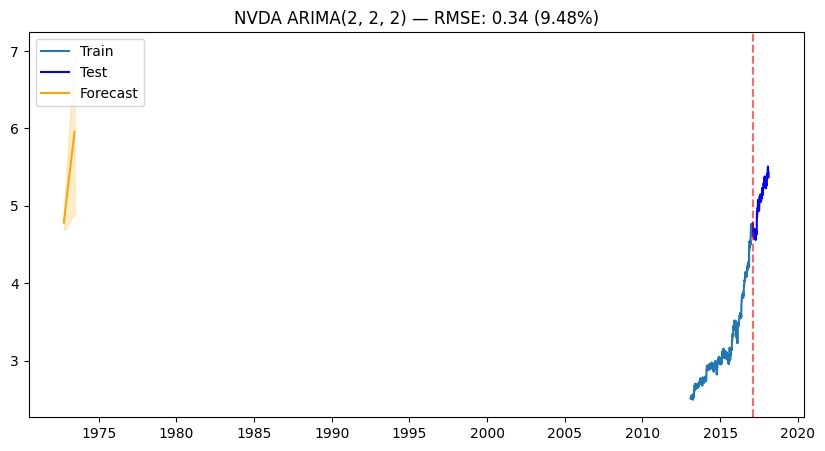

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

# Filter NVDA data
ticker = "NVDA"
metric = "close"
data = df_top10[df_top10['Name'] == ticker].copy()

# Prepare time series
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date']).set_index('date').sort_index()
series = data[metric].dropna()

# Optional log transform
log_transform = True
if log_transform:
    series = np.log(series.replace(0, np.nan)).dropna()

# Train/test split
test_size_ratio = 0.2
train_size = int(len(series) * (1 - test_size_ratio))
train, test = series.iloc[:train_size], series.iloc[train_size:]

# Auto ARIMA to find best (p, d, q)
auto_model = auto_arima(train, 
                        seasonal=False, 
                        trace=True,         # shows the search process
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True,
                        max_p=5, max_d=2, max_q=5)
p, d, q = auto_model.order

# Fit ARIMA
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Forecast
forecast_res = model_fit.get_forecast(steps=len(test))
forecast = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

# RMSE and % of mean
rmse = np.sqrt(mean_squared_error(test, forecast))
mean_price = series.mean()
rmse_pct = (rmse / mean_price) * 100
pass_check = "✅" if rmse_pct < 5 else "⚠️"

# Print results
print(f"{ticker} ARIMA{(p,d,q)}")
print(f"RMSE: {rmse:.2f}")
print(f"Mean Price: {mean_price:.2f}")
print(f"RMSE % of mean: {rmse_pct:.2f}% — {pass_check}")

# Plot
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='blue')
plt.plot(forecast, label='Forecast', color='orange')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], 
                 color='orange', alpha=0.2)
plt.axvline(test.index[0], color='red', linestyle='--', alpha=0.6)
plt.title(f"{ticker} ARIMA{(p,d,q)} — RMSE: {rmse:.2f} ({rmse_pct:.2f}%)")
plt.legend()
plt.show()


In [42]:
!pip install prophet

20:26:56 - cmdstanpy - INFO - Chain [1] start processing
20:26:56 - cmdstanpy - INFO - Chain [1] done processing


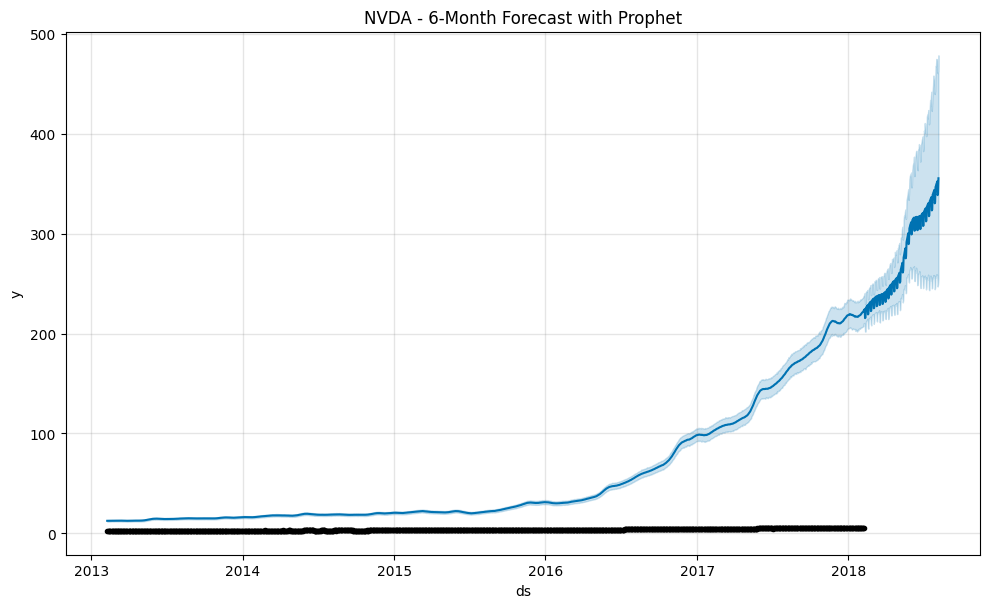

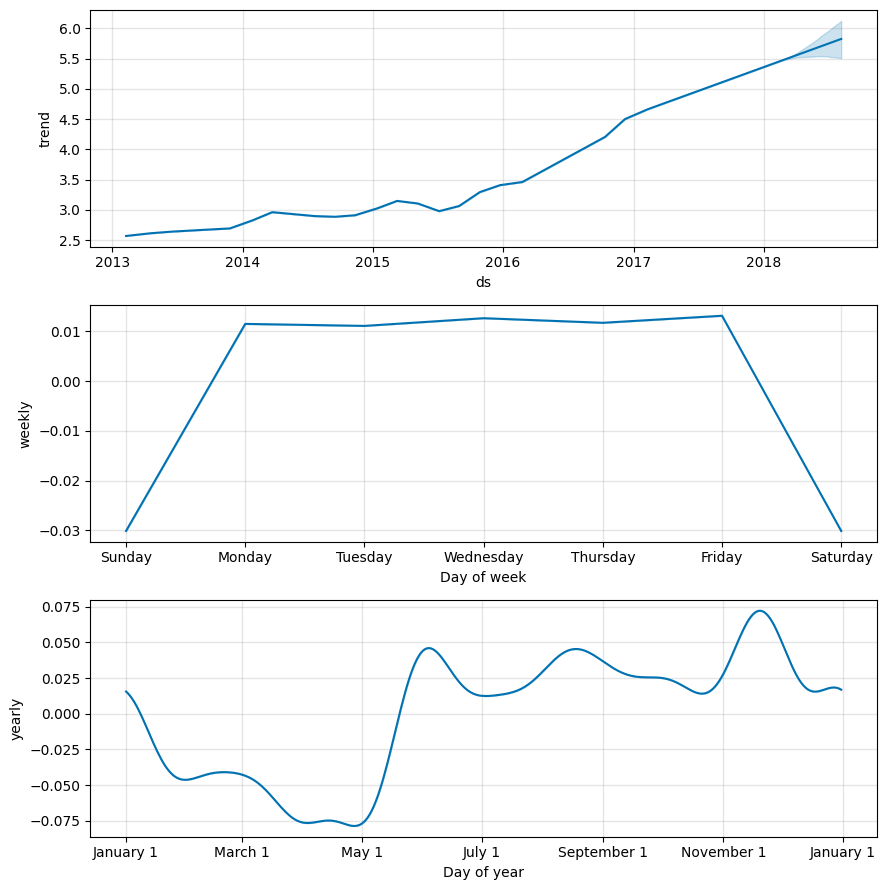

,ds,yhat,yhat_lower,yhat_upper
1429,2018-07-28,330.291369,244.338821,439.689468
1430,2018-07-29,331.415151,245.839395,442.379665
1431,2018-07-30,346.692401,257.714441,467.703457
1432,2018-07-31,347.768388,256.256596,467.625877
1433,2018-08-01,349.540031,259.338272,474.823689
1434,2018-08-02,350.462572,258.096480,474.409486
1435,2018-08-03,352.212056,258.775957,472.980802
1436,2018-08-04,338.507477,247.110514,460.599968
1437,2018-08-05,339.707584,249.071103,462.545620
1438,2018-08-06,355.384615,255.541890,478.427617


In [43]:
from prophet import Prophet
ticker = "NVDA"
metric = "close"
data = df_top10[df_top10['Name'] == ticker].copy()

data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date'])
df_prophet = data[['date', metric]].rename(columns={'date': 'ds', metric: 'y'})

log_transform = True
if log_transform:
    df_prophet['y'] = np.log(df_prophet['y'])

model = Prophet(daily_seasonality=False, yearly_seasonality=True)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=180)  # 180 days ~ 6 months
forecast = model.predict(future)

if log_transform:
    forecast['yhat'] = np.exp(forecast['yhat'])
    forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
    forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])

fig1 = model.plot(forecast)
plt.title(f"{ticker} - 6-Month Forecast with Prophet")
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


In [44]:
test_size_days = 180
train_df = df_prophet.iloc[:-test_size_days]
test_df = df_prophet.iloc[-test_size_days:]

model = Prophet(daily_seasonality=False, yearly_seasonality=True)
model.fit(train_df)

future = model.make_future_dataframe(periods=test_size_days)
forecast = model.predict(future)

forecast_test = forecast.tail(test_size_days).copy()

if log_transform:
    forecast_test['yhat'] = np.exp(forecast_test['yhat'])
    test_df['y'] = np.exp(test_df['y'])

rmse = np.sqrt(mean_squared_error(test_df['y'], forecast_test['yhat']))

mean_price = test_df['y'].mean()
rmse_pct = (rmse / mean_price) * 100

print(f"RMSE: {rmse:.2f}")
print(f"Mean Price: {mean_price:.2f}")
print(f"RMSE % of Mean: {rmse_pct:.2f}%")
if rmse_pct < 5:
    print("RMSE is less than 5% of mean price — good performance.")
else:
    print(" RMSE is more than 5% of mean price — may need improvement.")


20:26:58 - cmdstanpy - INFO - Chain [1] start processing
20:26:58 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 35.70
Mean Price: 183.81
RMSE % of Mean: 19.42%
 RMSE is more than 5% of mean price — may need improvement.


In [45]:
# Assuming df_top10 has 'date', 'Name', and 'close'
nvda = df_top10[df_top10['Name'] == 'NVDA'].copy()
nvda['date'] = pd.to_datetime(nvda['date'])
nvda = nvda.sort_values('date')

# Calculate daily returns
nvda['return'] = nvda['close'].pct_change()

# Drop NaN from first return
nvda = nvda.dropna(subset=['return'])


RMSE on returns: 0.02611
Mean return: 0.00247
RMSE % of mean return: 1056.95%


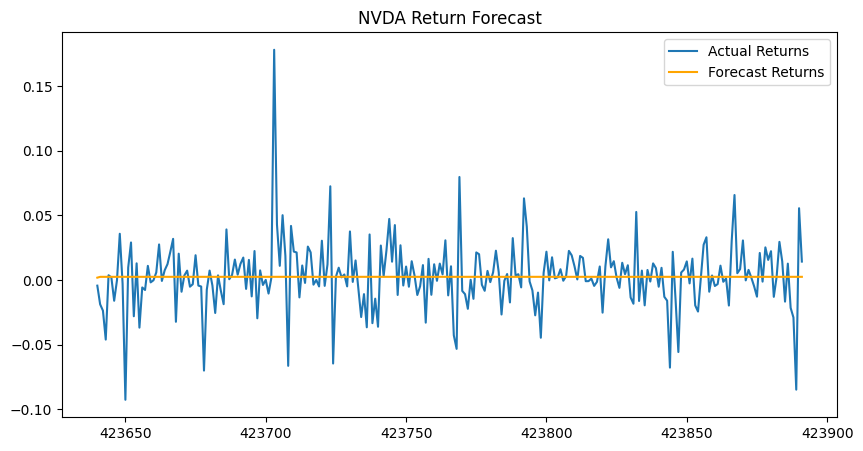

In [46]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Train/test split
test_size_ratio = 0.2
train_size = int(len(nvda) * (1 - test_size_ratio))
train, test = nvda['return'].iloc[:train_size], nvda['return'].iloc[train_size:]

# Fit ARIMA (you can use auto_arima here)
p, d, q = (1, 0, 1)  # often d=0 since returns are already stationary
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# RMSE on returns
rmse = np.sqrt(mean_squared_error(test, forecast))
mean_return = train.mean()
rmse_pct = (rmse / abs(mean_return)) * 100  # relative to mean return
print(f"RMSE on returns: {rmse:.5f}")
print(f"Mean return: {mean_return:.5f}")
print(f"RMSE % of mean return: {rmse_pct:.2f}%")

# Plot
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label='Actual Returns')
plt.plot(test.index, forecast, label='Forecast Returns', color='orange')
plt.title('NVDA Return Forecast')
plt.legend()
plt.show()


In [47]:
volatility = train.std()
rmse_vol_pct = (rmse / volatility) * 100

print(f"Volatility (std of returns): {volatility:.4f}")
print(f"RMSE % of volatility: {rmse_vol_pct:.2f}%")


Volatility (std of returns): 0.0213
RMSE % of volatility: 122.59%
